<font color =#C70039>
    
# Capstone Project NLP - Bellamkonda Lokesh Sreekanth

## Total Assessment 100 Marks
</font>

**DOMAIN:** Industrial safety. NLP based Chatbot


• **CONTEXT:** The  database  comes  fromone  of  the  biggest  industry  in  Brazil  and  in  the  world.  It  is  an  urgent  need  for  industries/companies  around  the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

• **DATA DESCRIPTION:** 

This  The  database  is  basically  records  of  accidents  from12  different  plants  in  03  different  countrieswhich  every  line  in  the  data  is  an occurrence of an accident:

**Columns description:**

* Data: timestamp or time/date information
* Countries: which country the accident occurred (anonymised)
* Local: the city where the manufacturing plant is located (anonymised)
* Industry sector: which sector the plant belongs to
* Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
* Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
* Genre: if the person is male of female
* Employee or Third Party: if the injured person is an employee or a third party
* Critical Risk: some description of the risk involved in the accident.
* Description: Detailed description of how the accident happened.

• **PROJECT OBJECTIVE:** Design  a  ML/DL  based  chatbot  utility  which  can  help  the  professionals  to  highlight  the  safety  risk  as  per  the  incident description.

<font color = #19a9a2>
    
### PROJECT TASK: [ Score - 100 Points ]
    
</font>

<font color = #164EEE>
    
### Milestone 1: [ Score: 40 Points ]
    
</font>

<font color=8C461C>
    
#### Input: Context and Dataset

<font color=8C461C>

<font color=8C461C>

#### Process 
    
</font>  

<font color=3d85c6>
    
#### Step 1: Import the data [3 Points]

</font>  

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Loading the IHMStefanini Industrail safety and health database with accidents dataset 

industrial_safety_df = pd.read_csv("/Users/sreekanthbl/Desktop/AIML/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")

In [3]:
# Loading sample data from the dataset

industrial_safety_df.sample(10)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
136,148,2016-06-03 00:00:00,Country_03,Local_10,Others,II,II,Male,Third Party,Others,"During the field trip, on LT 01 of the Lajes t..."
49,61,2016-03-06 00:00:00,Country_01,Local_03,Mining,III,IV,Male,Third Party (Remote),Others,At a time when a worker and another partner we...
193,207,2016-08-18 00:00:00,Country_01,Local_03,Mining,I,III,Male,Employee,Others,"At level 3450 access 4 A2, the operator of the..."
297,311,2017-01-17 00:00:00,Country_01,Local_03,Mining,I,III,Male,Employee,remains of choco,"At level 3450, Tajo area 2; after completing t..."
239,253,2016-10-18 00:00:00,Country_01,Local_03,Mining,IV,IV,Male,Third Party,Others,In circumstances that the assistant of mine wa...
19,19,2016-02-21 00:00:00,Country_01,Local_06,Metals,I,III,Male,Employee,Others,The worker Manuel was making the disconnection...
329,343,2017-02-15 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,"On 02/15/2017 at 3:27 pm, when performing the ..."
232,246,2016-10-04 00:00:00,Country_03,Local_10,Others,III,III,Male,Employee,Others,"In the probe 5068 bore BAPDD00146, around 15:0..."
56,68,2016-03-13 00:00:00,Country_01,Local_03,Mining,I,III,Male,Employee,Others,In circumstances that the Operator 176 was goi...
372,386,2017-04-11 00:00:00,Country_02,Local_07,Mining,I,II,Male,Third Party (Remote),Others,"At the end of the concreting activity, the emp..."


In [4]:
# Printing the shape of the dataset

print("The dataset has {0} rows and {1} columns.".format(industrial_safety_df.shape[0], industrial_safety_df.shape[1]))

The dataset has 425 rows and 11 columns.


In [5]:
# Checking the datatypes of the dataset

industrial_safety_df.dtypes

Unnamed: 0                   int64
Data                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Genre                       object
Employee or Third Party     object
Critical Risk               object
Description                 object
dtype: object

In [6]:
# Checking number of rows, columns and datatypes of the dataset through info

industrial_safety_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.7+ KB


**Observations:**
   1. There are total 425 rows and 11 features.
   2. Except 1st column -unnamed, all the other features are of object data type. 1st column unnamed is of int64 type.
   3. Data column can be converted to Date type.
   4. Description column contains lot of text data.

<font color=3d85c6>
    
#### Step 2. Data cleansing. [5 Points]

</font>

In [7]:
# Checking percentage of missing values in each of the features

industrial_safety_df.isnull().mean()*100

Unnamed: 0                  0.0
Data                        0.0
Countries                   0.0
Local                       0.0
Industry Sector             0.0
Accident Level              0.0
Potential Accident Level    0.0
Genre                       0.0
Employee or Third Party     0.0
Critical Risk               0.0
Description                 0.0
dtype: float64

In [8]:
# Number of missing values in each feature

industrial_safety_df.isnull().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

**Observations:**
    
 * There are no missing values in the dataset

In [9]:
# Removing unnamed column as it doesn't add any value

industrial_safety_df.drop("Unnamed: 0",axis=1, inplace=True)

In [10]:
# Checking if unnamed column is dropped or not

industrial_safety_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      425 non-null    object
 1   Countries                 425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Genre                     425 non-null    object
 7   Employee or Third Party   425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


**Observations:**

* Unnamed column is removed from the dataset.

In [11]:
# Checking for presence of duplicate records in the dataset

industrial_safety_df.duplicated().sum()

7

**Observations:**

* There are 7 duplicate records in the dataset.

In [12]:
# Displaying the duplicate records of the dataset

duplicates = industrial_safety_df.duplicated()

industrial_safety_df[duplicates]

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
77,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
262,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
303,2017-01-21 00:00:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
345,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
346,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
355,2017-03-15 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...
397,2017-05-23 00:00:00,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...


In [13]:
# dropping the duplicate rows

industrial_safety_df.drop_duplicates(inplace =True)

In [14]:
print(' Number of rows in the industrial_safety_df dataset after dropping the duplicates:',len(industrial_safety_df))

 Number of rows in the industrial_safety_df dataset after dropping the duplicates: 418


In [15]:
# Renaming Columns 'Data' to 'Date', 'Countries' to 'Country', 'Genre' to 'Gender' and 'Employee or Third Party' to 'Employee Type' 
# as it makes more sense.


industrial_safety_df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)

In [16]:
# Checking sample data from dataset to check if column names have been renamed.

industrial_safety_df.sample(5)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
316,2017-02-07 00:00:00,Country_01,Local_04,Mining,I,II,Male,Third Party,Others,The collaborator completed the misalignment of...
204,2016-09-02 00:00:00,Country_01,Local_03,Mining,I,I,Male,Third Party,Others,At level 4150 (+80) Unicon plant the collabora...
141,2016-06-07 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party,Others,"In phase III of the concentrator plant, the ma..."
55,2016-03-14 00:00:00,Country_01,Local_06,Metals,II,III,Male,Third Party (Remote),Chemical substances,"During the discharge of waste, the operator pr..."
87,2016-04-11 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Others,Once the RB machine is lifted (weight 7 tn) at...


**Observations:**

* Columns have been renamed accordingly in the dataset.

In [17]:
# Since the datatypes of all the features in the dataset is of object type, we cannot check for outliers.
# So checking for unique values of all the features except 'Description' column.

for col in industrial_safety_df.columns:
    if col != 'Description':
      print('--'*35); 
      print(f'Unique values of "{col}" column'); 
      print('--'*35)
      print(industrial_safety_df[col].unique())
      print('\n')

----------------------------------------------------------------------
Unique values of "Date" column
----------------------------------------------------------------------
['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' 

**Observations:**

* The data spans for the duration between 2016-01-01 to 2017-07-09.
* Country Column has only three unique values -Country_01, Country_02 and Country_03.
* Local column has 12 unique values.
* Industry sector column also three unique values -Mining, Metals and Others.
* There are 5 unique values for Accident levels and 6 unique values for Potential Accident Levels.
* Employee types is of 3 types -Employee,Third Party and Third Party (Remote).

**Data Cleansing Observations:**

* There are no missing values in the dataset.
* One feature -Unnamed was dropped from the dataset as it doesn't add much data.
* There were 7 duplicate records in the dataset and they were removed.
* Number of rows in the dataset after dropping the duplicates: 418, Number of features in the dataset: 10.
* Columns such as Date, Countries, Genre, Employee or Third Party have been renamed appropriately.

<font color=3d85c6>
    
#### Step 3. Data preprocessing (NLP Preprocessing techniques) [ 7 points ]

</font>

Before moving to NLP Preprocessing techniques, we need to do examine the existing data and see if creating new features can help in gaining additional insights into the data.

* Extracting Day, Month and Year from Date column will give a better insights on trend of accidents. Prior to that Date column needs to be converted from object type to datetime object type.
* Similarly grouping the months to seasons would also help in understanding if there is a trend of accidents in certain seasons.

In [18]:
# Converting values in the 'Date' column to as datetime objects.

industrial_safety_df['Date'] = pd.to_datetime(industrial_safety_df['Date'])

industrial_safety_df.dtypes

Date                        datetime64[ns]
Country                             object
Local                               object
Industry Sector                     object
Accident Level                      object
Potential Accident Level            object
Gender                              object
Employee type                       object
Critical Risk                       object
Description                         object
dtype: object

Date column is now converted from object type to datetime object type.

In [19]:
# Using lambda functions to extract day, month and year out of the Date feature,creating, adding those three new features to the dataset

industrial_safety_df['Day'] = industrial_safety_df['Date'].apply(lambda x : x.day)
industrial_safety_df['Month'] = industrial_safety_df['Date'].apply(lambda x : x.month)
industrial_safety_df['Year'] = industrial_safety_df['Date'].apply(lambda x : x.year)

In [20]:
industrial_safety_df.sample(5)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Day,Month,Year
40,2016-02-29,Country_02,Local_02,Mining,II,IV,Male,Employee,Others,"During maintenance of the Flyght pump rotor, t...",29,2,2016
17,2016-02-07,Country_01,Local_06,Metals,I,II,Female,Third Party,Others,Due to the overheating of 2 bars in row 5 of c...,7,2,2016
285,2017-01-02,Country_01,Local_06,Metals,I,II,Male,Third Party (Remote),Pressed,"At 13:40 hours, Mr. Jose performed the erasing...",2,1,2017
129,2016-05-25,Country_03,Local_10,Others,I,I,Male,Third Party,Bees,The ground team coordinated by Prospector with...,25,5,2016
235,2016-10-10,Country_01,Local_04,Mining,III,IV,Male,Employee,Others,Being approx. 23:45 hrs. Mr. Eliseo secondary ...,10,10,2016


Now we need to group the months into different seasons. Since the dataset is from Brazil, using the information in the below link to group the months into seasons.

https://seasonsyear.com/Brazil

* Spring - September, October, November
* Summer - December, January, February
* Autumn - March, April, May
* Winter - June, July, August

In [21]:
# creating a function that accepts a number and returns a season 

def conv_month2season(x):
    # defining a dictionary mapping months to seasons
    month_season_mapping = {
        1: 'Summer', 2: 'Summer', 3: 'Autumn',
        4: 'Autumn', 5: 'Autumn', 6: 'Winter',
        7: 'Winter', 8: 'Winter', 9: 'Spring',
        10: 'Spring', 11: 'Spring', 12: 'Summer'
    }
    
    # return the corresponding season based on the month
    return month_season_mapping[x]

In [22]:
# Creating new feature Season using above created function

industrial_safety_df['Season'] = industrial_safety_df['Month'].apply(conv_month2season)

# Verify if the new feature Season is created and added to the dataset

industrial_safety_df.sample(10)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Day,Month,Year,Season
399,2017-05-30,Country_02,Local_12,Others,I,II,Female,Employee,Others,"Upon entering the building, the maid slipped a...",30,5,2017,Autumn
156,2016-06-21,Country_01,Local_01,Mining,I,III,Male,Third Party,Others,When the mechanical technician proceeded to pe...,21,6,2016,Winter
101,2016-04-28,Country_02,Local_05,Metals,I,III,Male,Third Party (Remote),Chemical substances,after discharging sodium hydroxide and disconn...,28,4,2016,Autumn
165,2016-07-08,Country_01,Local_01,Mining,I,II,Male,Employee,Others,In circumstances in which the adjutant of the ...,8,7,2016,Winter
378,2017-04-25,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,During the execution of the soil sampling task...,25,4,2017,Autumn
325,2017-02-13,Country_02,Local_08,Metals,II,III,Male,Employee,Pressed,"While preparing to mount polypropylene tubing,...",13,2,2017,Summer
311,2017-01-31,Country_02,Local_08,Metals,I,III,Male,Employee,Others,During the assembly activity of polypropylene ...,31,1,2017,Summer
63,2016-03-14,Country_02,Local_05,Metals,I,IV,Male,Employee,Chemical substances,The employee checked for acid leakage in the s...,14,3,2016,Autumn
95,2016-04-18,Country_01,Local_03,Mining,I,III,Male,Third Party,Others,When moving a roll of electro-welded mesh of 9...,18,4,2016,Autumn
113,2016-05-05,Country_02,Local_05,Metals,I,III,Male,Third Party,Manual Tools,The employee was sanding a piece in the Electr...,5,5,2016,Autumn


We can apply below NLP pre-processing steps on the description column of dataset

* Converting to lower case, avoid any capital cases
* Removing special characters from the text
* Removing spaces at the beginning and at the end of the string
* Removing punctuation marks
* Removing extra spaces between words
* Removing stop words
* Lemmatization
* Stemming

In [23]:
# importing nlp libraries

import os
import re
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.corpus import stopwords
stop = stopwords.words('english')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer(language='english')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sreekanthbl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sreekanthbl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sreekanthbl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sreekanthbl/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sreekanthbl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
# Displaying value of 'Description' from third row 

industrial_safety_df['Description'][3]

'Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the "DADO" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.'

**Converting to Lowercase**

In [25]:
# Converting Description to lower case
industrial_safety_df['Cleaned_Description'] = industrial_safety_df['Description'].apply(lambda x : x.lower())

# Verify the changes
industrial_safety_df['Cleaned_Description'][3]

'being 9:45 am. approximately in the nv. 1880 cx-695 ob7, the personnel begins the task of unlocking the soquet bolts of the bhb machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding mr. cristóbal - auxiliary assistant to climb to the platform to exert pressure with your hand on the "dado" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.'

**Removing special characters**

In [26]:
# Removing special characters in Description
industrial_safety_df['Cleaned_Description'] = industrial_safety_df['Cleaned_Description'].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))

# Verify the changes
industrial_safety_df['Cleaned_Description'][3]

'being 9 45 am approximately in the nv 1880 cx 695 ob7 the personnel begins the task of unlocking the soquet bolts of the bhb machine when they were in the penultimate bolt they identified that the hexagonal head was worn proceeding mr crist bal auxiliary assistant to climb to the platform to exert pressure with your hand on the dado key to prevent it from coming out of the bolt in those moments two collaborators rotate with the lever in anti clockwise direction leaving the key of the bolt hitting the palm of the left hand causing the injury '

**Removing spaces at the beginning and at the end of the string**

In [27]:
# Remove spaces at the beginning and at the end of the string

industrial_safety_df['Cleaned_Description'] = industrial_safety_df['Cleaned_Description'].apply(lambda x: x.strip())

# Verify the changes
industrial_safety_df['Cleaned_Description'][3]

'being 9 45 am approximately in the nv 1880 cx 695 ob7 the personnel begins the task of unlocking the soquet bolts of the bhb machine when they were in the penultimate bolt they identified that the hexagonal head was worn proceeding mr crist bal auxiliary assistant to climb to the platform to exert pressure with your hand on the dado key to prevent it from coming out of the bolt in those moments two collaborators rotate with the lever in anti clockwise direction leaving the key of the bolt hitting the palm of the left hand causing the injury'

**Removing punctuation in the description** 

In [28]:
import string
from string import punctuation

def remove_punctuation(text):
    # Define a string containing all punctuation marks
    punctuation = string.punctuation
    
    # Replace punctuation marks with an empty string
    text = text.translate(str.maketrans('', '', punctuation))
    return text

# Apply the remove_punctuation function to the 'Cleaned_Description' column
industrial_safety_df['Cleaned_Description'] = industrial_safety_df['Cleaned_Description'].apply(remove_punctuation)

# Verify the changes
industrial_safety_df['Cleaned_Description'][3]

'being 9 45 am approximately in the nv 1880 cx 695 ob7 the personnel begins the task of unlocking the soquet bolts of the bhb machine when they were in the penultimate bolt they identified that the hexagonal head was worn proceeding mr crist bal auxiliary assistant to climb to the platform to exert pressure with your hand on the dado key to prevent it from coming out of the bolt in those moments two collaborators rotate with the lever in anti clockwise direction leaving the key of the bolt hitting the palm of the left hand causing the injury'

**Removing extra spaces between words**

In [29]:
def remove_extra_spaces(text):
    
    # Replace multiple spaces with a single space
    return ' '.join(text.split())

# Apply remove_extra_spaces function to 'Text' column
industrial_safety_df['Cleaned_Description'] = industrial_safety_df['Cleaned_Description'].apply(remove_extra_spaces)

# Verify the changes
industrial_safety_df['Cleaned_Description'][3]

'being 9 45 am approximately in the nv 1880 cx 695 ob7 the personnel begins the task of unlocking the soquet bolts of the bhb machine when they were in the penultimate bolt they identified that the hexagonal head was worn proceeding mr crist bal auxiliary assistant to climb to the platform to exert pressure with your hand on the dado key to prevent it from coming out of the bolt in those moments two collaborators rotate with the lever in anti clockwise direction leaving the key of the bolt hitting the palm of the left hand causing the injury'

**Removing stopwords**

In [30]:
# Remove stopwords

industrial_safety_df['Cleaned_Description'] = industrial_safety_df['Cleaned_Description'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop]))

# Verify the changes
industrial_safety_df['Cleaned_Description'][3]

'9 45 approximately nv 1880 cx 695 ob7 personnel begins task unlocking soquet bolts bhb machine penultimate bolt identified hexagonal head worn proceeding mr crist bal auxiliary assistant climb platform exert pressure hand dado key prevent coming bolt moments two collaborators rotate lever anti clockwise direction leaving key bolt hitting palm left hand causing injury'

**Lemmatizing the Description**

In [31]:
# Lemmatizing the Description**

def lemmatize_text(text):
    
    # Initialize WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Tokenize text into words
    tokens = nltk.word_tokenize(text)
    
    # Tag parts of speech for each token
    tagged_tokens = nltk.pos_tag(tokens)
    
    # Map Penn Treebank POS tags to WordNet POS tags
    pos_map = {
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV,
        'J': wordnet.ADJ
    }
    
    # Lemmatize each token based on its POS tag
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos_map.get(pos[0], wordnet.NOUN)) for token, pos in tagged_tokens]
    
    # Join lemmatized tokens back into a string
    return ' '.join(lemmatized_tokens)

# Apply lemmatize_text function to 'Cleaned_Description' column
industrial_safety_df['Cleaned_Description'] = industrial_safety_df['Cleaned_Description'].apply(lemmatize_text)

# Display the DataFrame with lemmatized text
industrial_safety_df['Cleaned_Description'][3]

'9 45 approximately nv 1880 cx 695 ob7 personnel begin task unlocking soquet bolt bhb machine penultimate bolt identify hexagonal head worn proceed mr crist bal auxiliary assistant climb platform exert pressure hand dado key prevent come bolt moment two collaborator rotate lever anti clockwise direction leave key bolt hit palm leave hand cause injury'

**Stemming the Description**

In [32]:
def stem_text(text):
    
    # Tokenize text into words
    tokens = nltk.word_tokenize(text)
    
    # Stem each token
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    # Join stemmed tokens back into a string
    return ' '.join(stemmed_tokens)

# Apply stem_text function to 'Cleaned_Description' column
industrial_safety_df['Cleaned_Description'] = industrial_safety_df['Cleaned_Description'].apply(stem_text)

# Display the DataFrame with stemmed text
industrial_safety_df['Cleaned_Description'][3]

'9 45 approxim nv 1880 cx 695 ob7 personnel begin task unlock soquet bolt bhb machin penultim bolt identifi hexagon head worn proceed mr crist bal auxiliari assist climb platform exert pressur hand dado key prevent come bolt moment two collabor rotat lever anti clockwis direct leav key bolt hit palm leav hand caus injuri'

**Ngrams**

an n-gram is a contiguous sequence of n items (words, characters, or other linguistic units) from a given sample of text or speech. The "n" in n-gram represents the number of items in the sequence.
They are used as features for text classification tasks, such as sentiment analysis, spam detection, and topic classification,in search engines to improve the relevance of search results by considering 
the context of words in queries and documents.
    
For example:

* A unigram (1-gram) is a single word.
* A bigram (2-gram) is a sequence of two consecutive words.
* A trigram (3-gram) is a sequence of three consecutive words.
* An n-gram with n greater than 3 is referred to as an n-gram or higher-order n-gram.

In [33]:
from nltk import ngrams

# Function to extract n-grams from text data in a dataFrame, optionally filtered by a target column and its values.
 
def create_ngrams(ngram, trg='', trg_value=''):
    """
    Extract n-grams from text data in a DataFrame, optionally filtered by a target column and its values.

    Parameters:
    - ngram (int): The size of n-grams.
    - trg (str): The name of the target column for filtering (default is '').
    - trg_value (list): The list of target values for filtering (default is '').

    Returns:
    - DataFrame: A DataFrame with n-grams and their counts.
    """
    # Filter the text data based on the target column and its values
    if trg == '' or trg_value == '':
        string_filtered = industrial_safety_df['Cleaned_Description'].sum().split()
    else:
        string_filtered = industrial_safety_df[industrial_safety_df[trg].isin(trg_value)]['Cleaned_Description'].sum().split()

    # Calculate n-grams and their counts
    ngram_freq = nltk.FreqDist(nltk.ngrams(string_filtered, ngram)).most_common(30)

    # Create a DataFrame with n-grams and their counts
    ngram_df = pd.DataFrame(ngram_freq, columns=['ngram', 'count'])

    # Set n-grams as index
    ngram_df.index = [' '.join(i) for i in ngram_df.ngram]

    # Drop the 'ngram' column
    ngram_df.drop('ngram', axis=1, inplace=True)

    return ngram_df

In [34]:
# Unigrams
unigrams = create_ngrams(1, trg='Cleaned_Description')

# Printing top 10 words with their counts
unigrams[0:10]

,count
caus,190
leav,155
hand,154
right,153
oper,142
employe,108
time,104
use,102
activ,99
hit,97


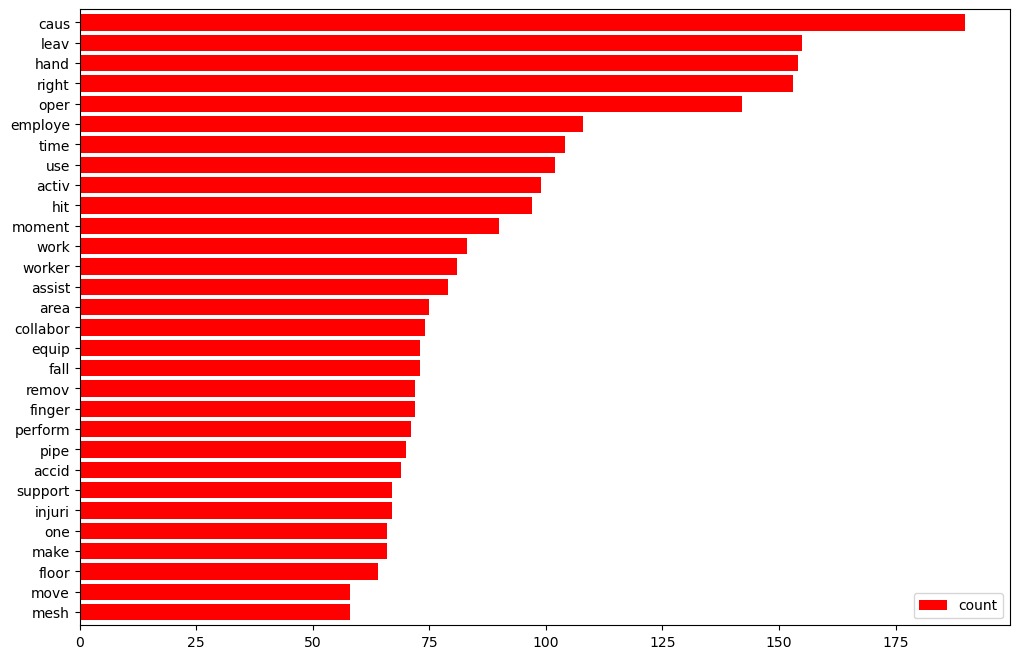

In [35]:
# Visualizing the unigrams distribution

unigrams.sort_values(by='count').plot.barh(color = 'red', width = 0.8, figsize = (12,8));

In [36]:
# Bigrams
bigrams = create_ngrams(2, trg='Cleaned_Description')

# Printing top 10 words with their counts
bigrams[0:10]

,count
time accid,55
leav hand,50
right hand,48
caus injuri,37
finger leav,25
hand caus,15
fragment rock,15
injur person,15
finger right,14
medic center,14


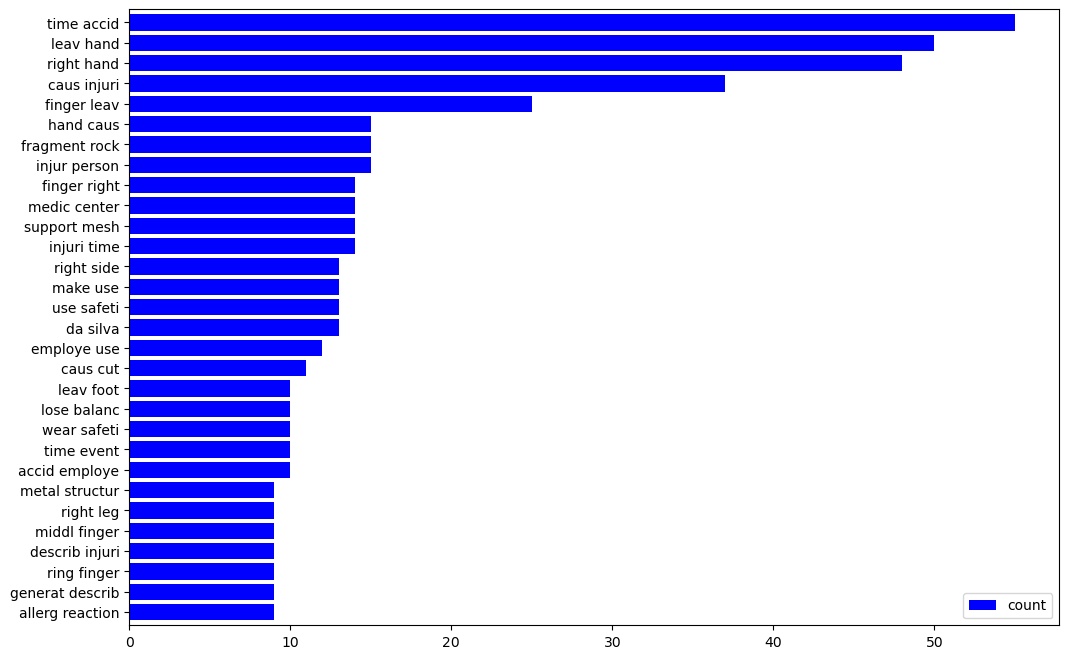

In [37]:
# Visualizing the bigrams distribution

bigrams.sort_values(by='count').plot.barh(color = 'blue', width = 0.8, figsize = (12,8));

In [38]:
# Trigrams
trigrams = create_ngrams(3, trg='Cleaned_Description')

# Printing top 10 words with their counts
trigrams[0:10]

,count
finger leav hand,19
injuri time accid,13
finger right hand,11
time accid employe,9
describ time accid,7
leav hand caus,6
time accid worker,6
right hand caus,6
accid employe use,6
worker wear safeti,5


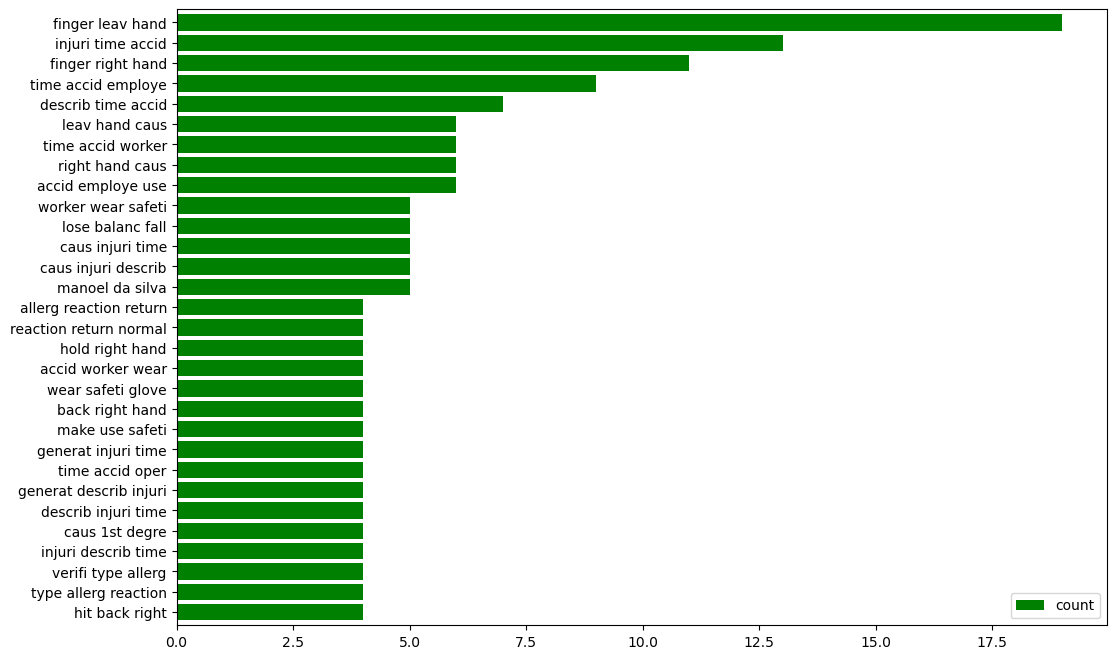

In [39]:
# Visualizing the trigrams distribution

trigrams.sort_values(by='count').plot.barh(color = 'green', width = 0.8, figsize = (12,8));

**Observations**

As per the above ngram analysis, there are hand related, movement related, Employee related and Accident related words.
* Hand related : left hand, right hand, left finger, right finger, middle finger, ring finger, left foot, and glove
* Movement related : loose balance, fall, hit, carri, lift and slip
* Employee related: employee, worker and mechanic
* Accident related: accident, activity, injury, causing, safety etc


<font color=3d85c6>
    
####  Exploratory Data Analysis (EDA)

</font>

**Univariate Analysis**

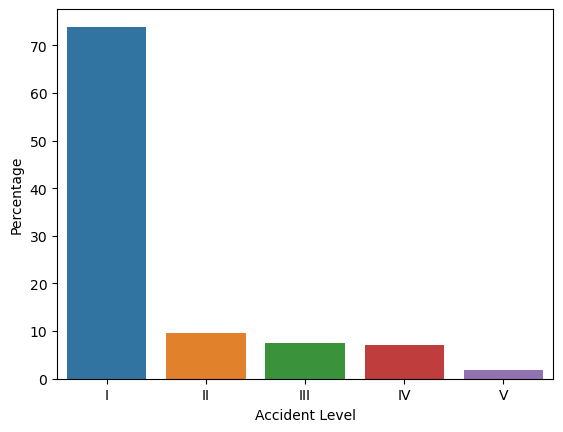

In [40]:
# Visualing the distribution of Target variable -Accident level

accident_level_data = industrial_safety_df['Accident Level'].value_counts(normalize=True) * 100

# Create a count plot with percentages
sns.barplot(x=accident_level_data.index, y=accident_level_data.values);
plt.ylabel('Percentage')

# Show the plot
plt.show()

**Observations:**

* Target variable is unevenly distributed.
* Accident Level I has ~ 75% distribution with majority of accidents falling under under Level I
* Rest of the accident levels are <=10%.
* Accident Level V is < 5%.

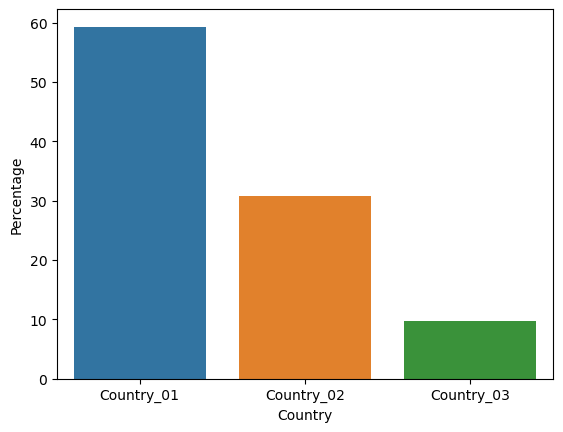

In [41]:
# Univarite analysis of Country

country_data = industrial_safety_df['Country'].value_counts(normalize=True) * 100

# Create a count plot with percentages
sns.barplot(x=country_data.index, y=country_data.values);
plt.ylabel('Percentage')

# Show the plot
plt.show()

**Observations:**

* Country_1 has majority of accidents (59%)
* Country_2 has moderate number of accidents(31%)
* Country_3 has comparitively less number of accidents(10%)

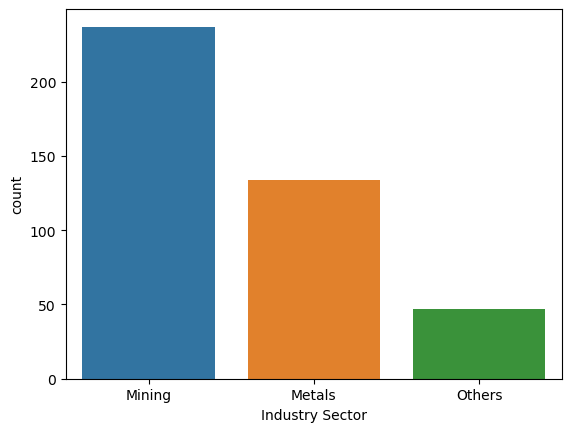

In [42]:
# Visualising the distribution of independent variable - Industry Sector

sns.countplot(industrial_safety_df, x='Industry Sector');


**Observations:**

* Mining industry has majority of accidents.
* Metals industry has moderate number of accidents.
* Other industries have comparitively less number of accidents.

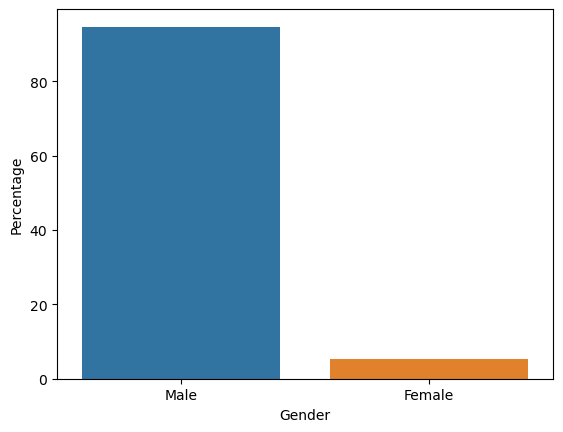

In [43]:
# Visualising the distribution of independent variable - Gender

gender_data = industrial_safety_df['Gender'].value_counts(normalize=True) * 100

# Create a count plot with percentages
sns.barplot(x=gender_data.index, y=gender_data.values);
plt.ylabel('Percentage')

# Show the plot
plt.show()

**Observations:**

* ~ 95% people injured in the accidents are males.
* ~ 5% people injured in the accidents are females.

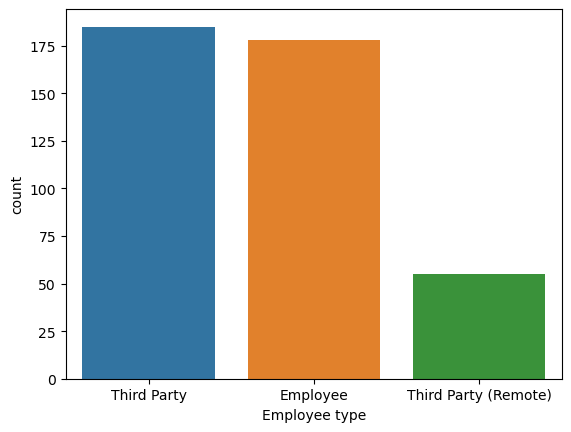

In [44]:
# Visualising the distribution of independent variable - Employee type

sns.countplot(industrial_safety_df, x='Employee type');


**Observations:**

* Equal number of people from Employee and Third Party got injured in the accidents
* Comparitively less number of people belonging to Employee Type -Third Party(Remote) got injured in the accidents.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Pressed'),
  Text(1, 0, 'Pressurized Systems'),
  Text(2, 0, 'Manual Tools'),
  Text(3, 0, 'Others'),
  Text(4, 0, 'Fall prevention (same level)'),
  Text(5, 0, 'Chemical substances'),
  Text(6, 0, 'Liquid Metal'),
  Text(7, 0, 'Electrical installation'),
  Text(8, 0, 'Confined space'),
  Text(9, 0, 'Pressurized Systems / Chemical Substances'),
  Text(10, 0, 'Blocking and isolation of energies'),
  Text(11, 0, 'Suspended Loads'),
  Text(12, 0, 'Poll'),
  Text(13, 0, 'Cut'),
  Text(14, 0, 'Fall'),
  Text(15, 0, 'Bees'),
  Text(16, 0, 'Fall prevention'),
  Text(17, 0, '\nNot applicable'),
  Text(18, 0, 'Traffic'),
  Text(19, 0, 'Projection'),
  Text(20, 0, 'Venomous Animals'),
  Text(21, 0, 'Plates'),
  Text(22, 0, 'Projection/Burning'),
  Text(23, 0, 'remains of choco'),
  Text(24, 0, 'Vehicles and Mobile Equipment'),
  Text(

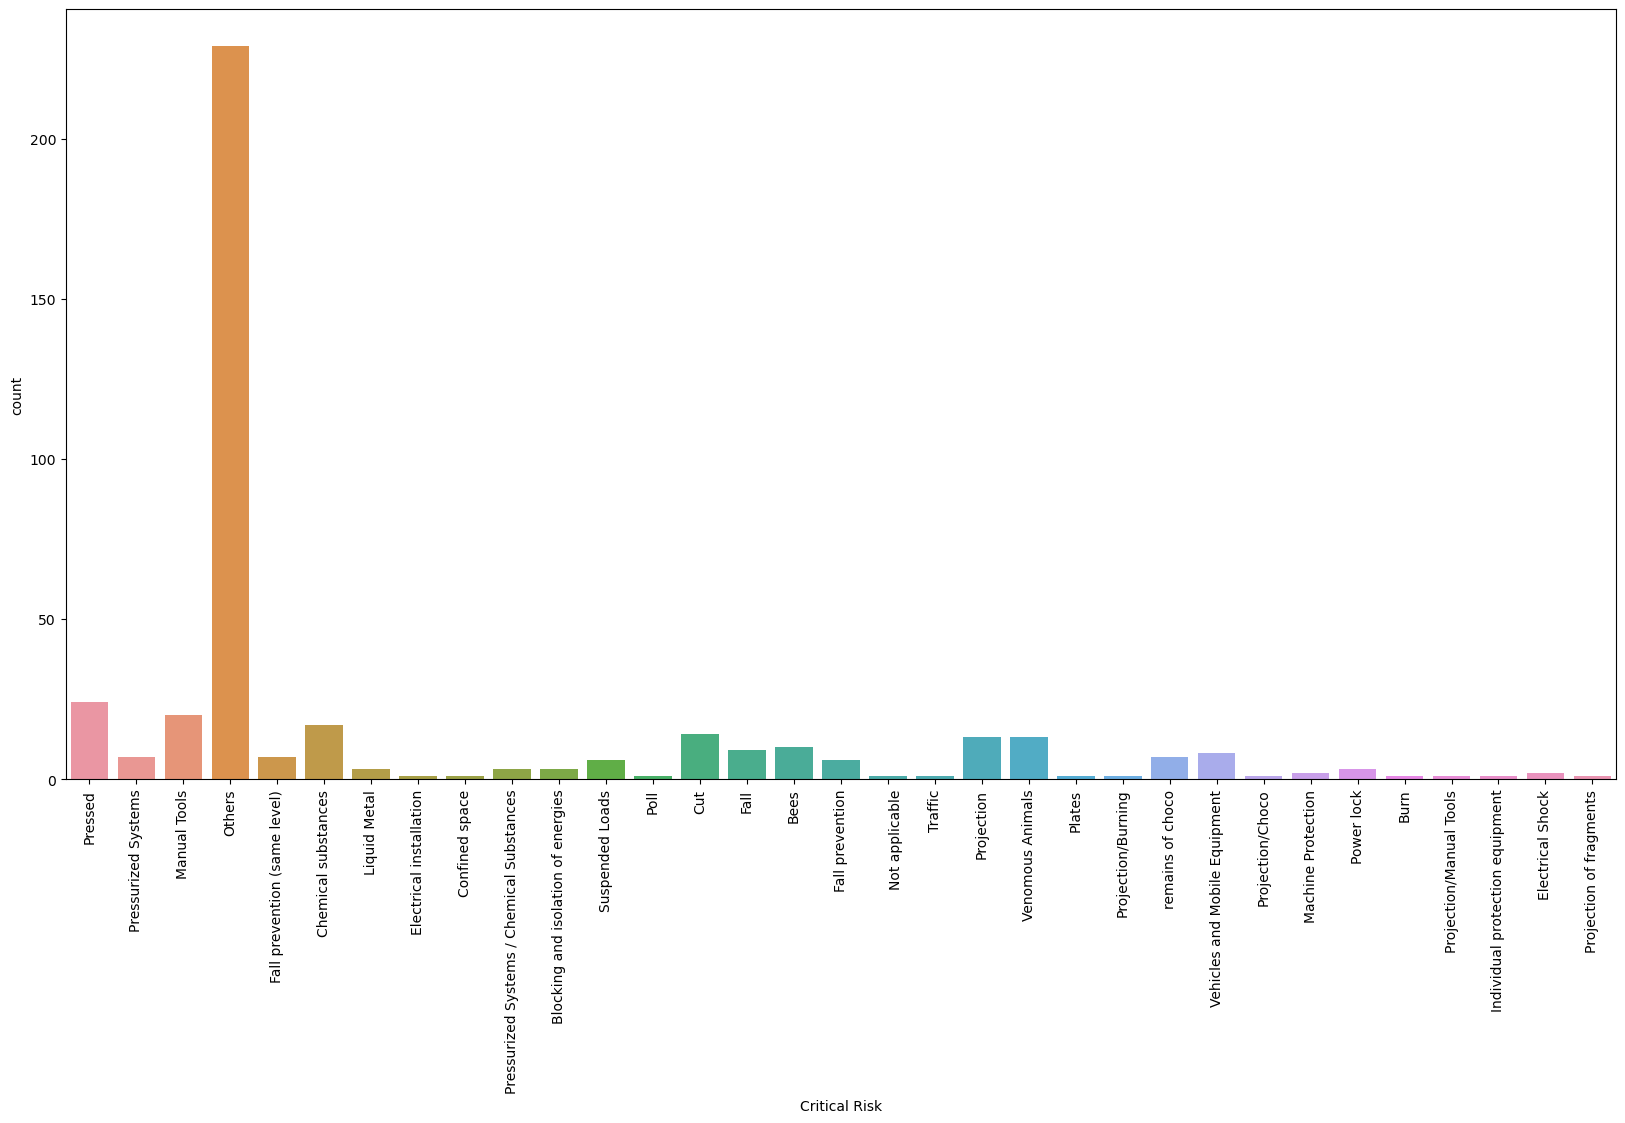

In [45]:
# Visualising the distribution of independent variable - Critical Risk

fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(industrial_safety_df, x='Critical Risk', ax=ax);
plt.xticks(rotation=90)

**Observations:**

* Majority of the Critical Risks fall in Others category

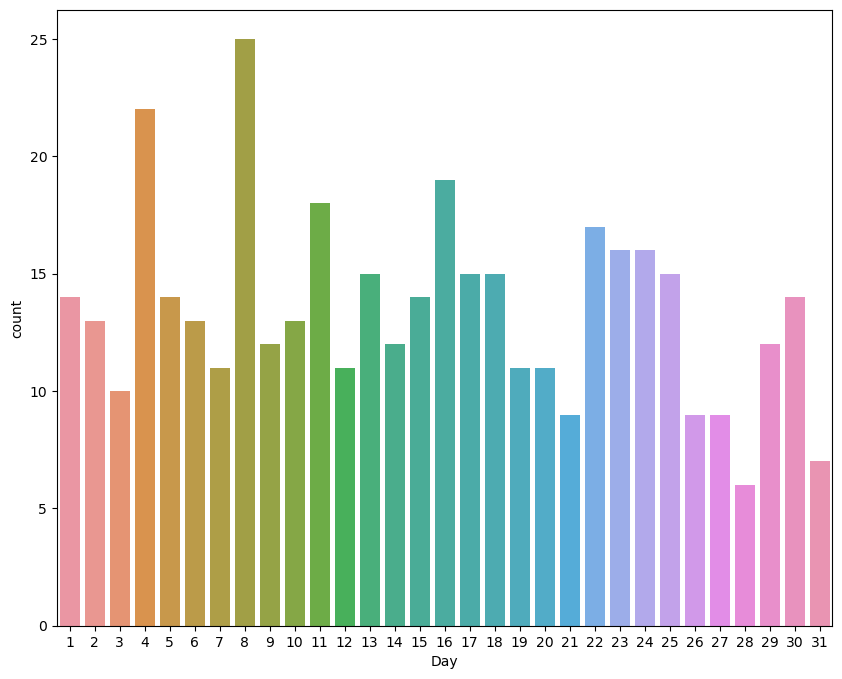

In [46]:
# Visualising the distribution of independent variable - Day

fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(industrial_safety_df, x='Day',ax=ax);


**Observations:**

* More number of accidents are reported in the first 15 days of the month.
* Day 4th and 8th of the month have reported more accidents.

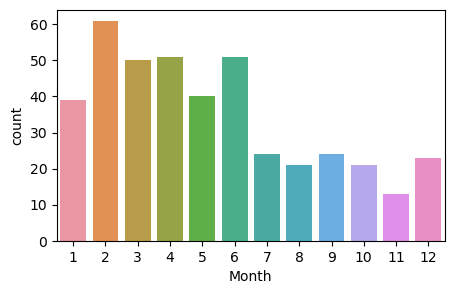

In [47]:
# Visualising the distribution of independent variable - Month

fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(industrial_safety_df, x='Month', ax=ax);

**Observations:**

* More number of accidents are reported in the first half of the year.
* Less number of accidents are reported in the second half of the year.

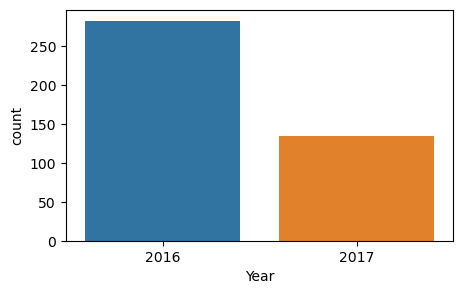

In [48]:
# Visualising the distribution of independent variable - Year

fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(industrial_safety_df, x='Year');

**Observations:**

* Majority of the accidents are reported in the year 2016.
* Less number of accidents are reported in 2017.

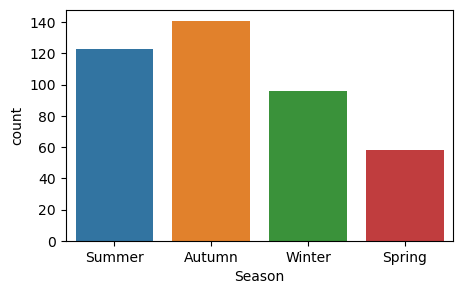

In [49]:
# Visualising the distribution of independent variable - Season

fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(industrial_safety_df, x='Season', ax=ax);

**Observations:**

* Autumn has highest number of accidents reported followed by Summer.
* Spring has relatively less number of accidents reported.

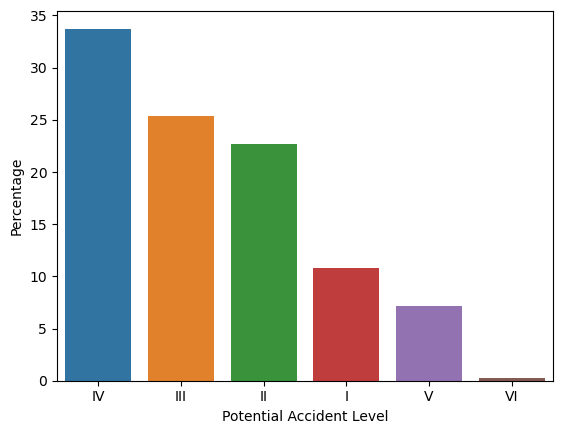

In [50]:
# Calculate the percentage of Potential Accident Level column

percentage_data = industrial_safety_df['Potential Accident Level'].value_counts(normalize=True) * 100

# Create a count plot with percentages
sns.barplot(x=percentage_data.index, y=percentage_data.values);
plt.ylabel('Percentage')

# Show the plot
plt.show()

**Observations:**

* Potential Accident Level IV has the highest count.
* Potential Accident Level VI has the lowest count.

**Bivariate Analysis**

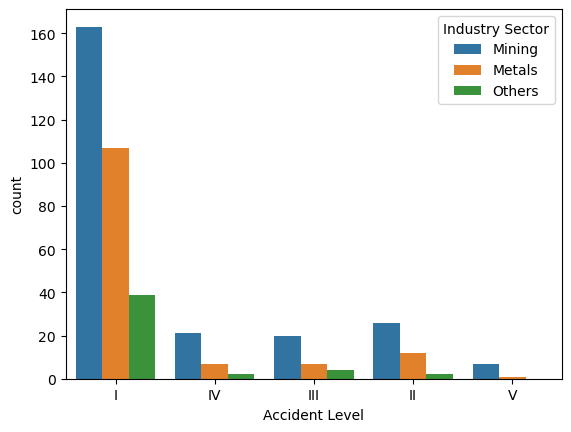

In [51]:
# Countplot for Accident Level and Industrial sector

sns.countplot(industrial_safety_df, x ='Accident Level', hue ='Industry Sector'); 

**Observations:**

* Majority of Accident Level I have happened in Mining Industry followed by Metals Industry.
* Both Mining and Metals industries have reported all types of Accident Levels.

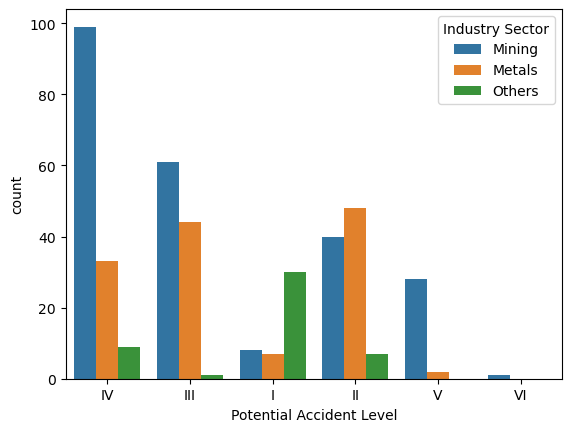

In [52]:
# Countplot for Potential Accident Level and Industrial sector

sns.countplot(industrial_safety_df, x ='Potential Accident Level', hue ='Industry Sector');

**Observations:**

* Highest number of Potential Accident Level IV are reported in Mining Industry .
* Highest number of Potential Accident Level II are reported in Metals Industry.

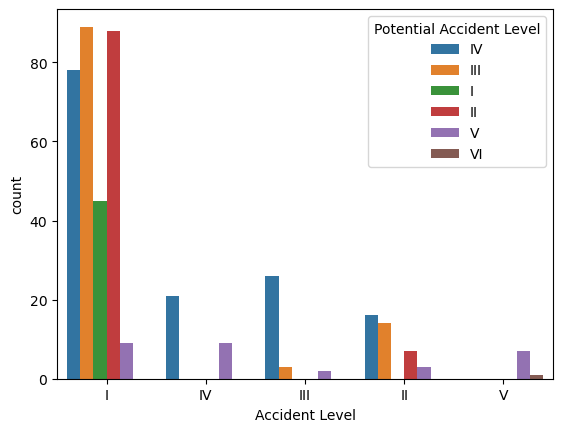

In [53]:
# Countplot for Accident Level and Potential Accident Level

sns.countplot(industrial_safety_df, x ='Accident Level', hue ='Potential Accident Level'); 

**Observations:**

* Majority of the Potential Accident Levels from I to V could have been become Accident Level I

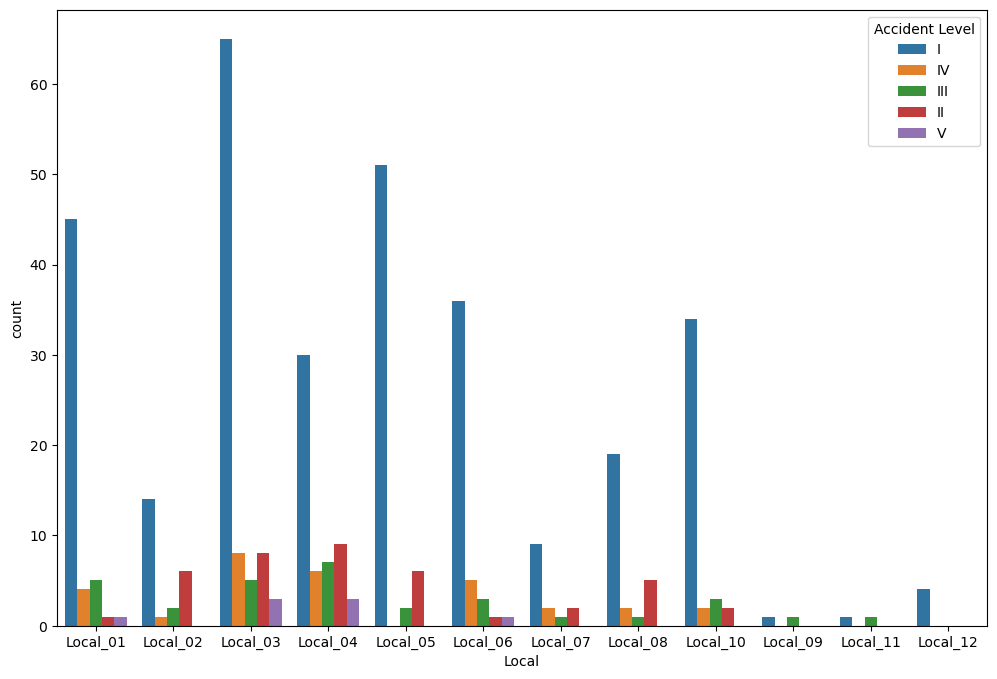

In [54]:
# Visualising Local with Accident Level

plt.figure(figsize=(12,8))
sns.countplot(industrial_safety_df,x=industrial_safety_df['Local'], hue = industrial_safety_df['Accident Level']);

**Observations:**

* Highest number of accidents are reported in Local_03, followed by Local_05.
* Highest number of Accident Level I are reported in Local_03, followed by Local_05 and Local_01

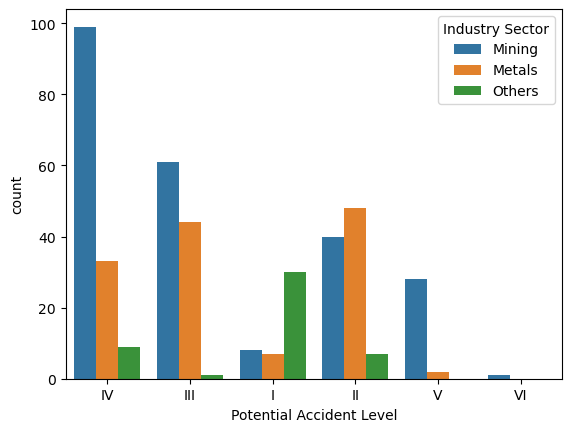

In [55]:
# Countplot for Potential Accident Level and Industrial sector

sns.countplot(industrial_safety_df, x ='Potential Accident Level', hue ='Industry Sector'); 

**Observations:**

* Mining sector reported highest number of Potential Accident Level IV.
* Metals sector reported highest number of Potential Accident Level II.
* No Potential Accident Level VI is reported on Metals or Others.
* Others sector reported highest number of Potential Accident Level I.

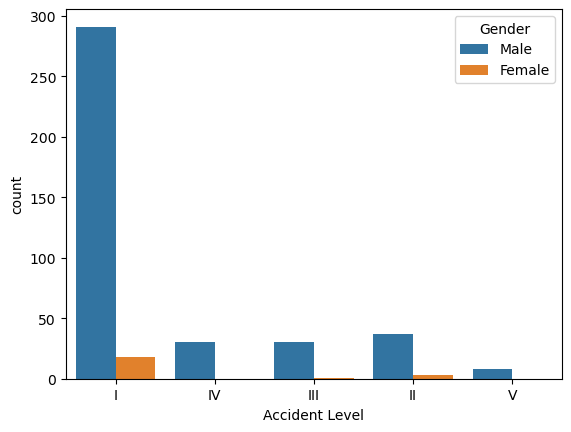

In [56]:
# Countplot for Accident Level and Gender

sns.countplot(industrial_safety_df, x ='Accident Level', hue ='Gender'); 

**Observations:**

* Most of the accidents happened to Males.
* Very few accidents were reported on Females.

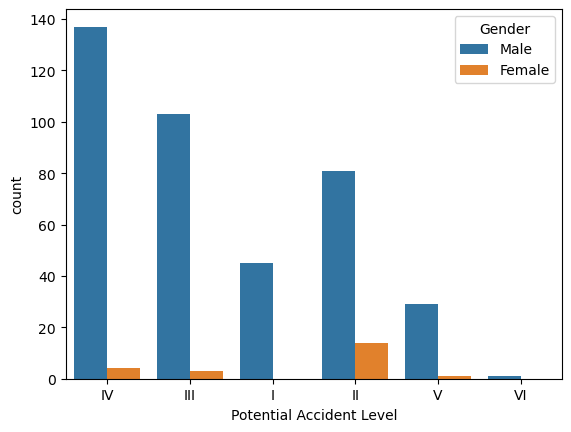

In [57]:
# Countplot for Potential Accident Level and Gender

sns.countplot(industrial_safety_df, x ='Potential Accident Level', hue ='Gender'); 

**Observations:**

*  Most of the Potential accident levels are reported on Males.
*  Potential Accident Level II reported on females is slightly higher than other Potential Accident Levels reported on them.


<Axes: xlabel='Employee type', ylabel='count'>

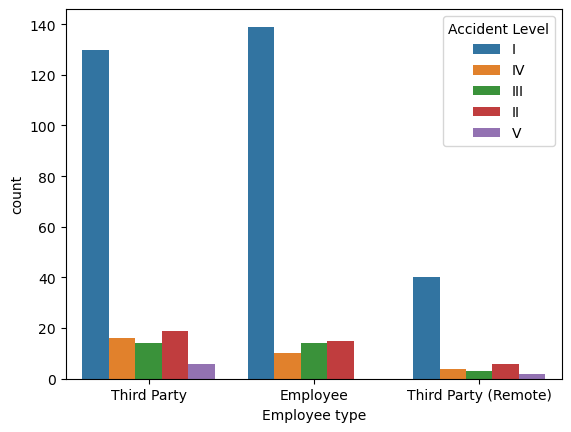

In [58]:
# Countplot for Employee or Third Party and Gender

sns.countplot(industrial_safety_df,x='Employee type', hue = 'Accident Level')

**Observations:**

* Accident Level V was mainly caused by third party and third party remote

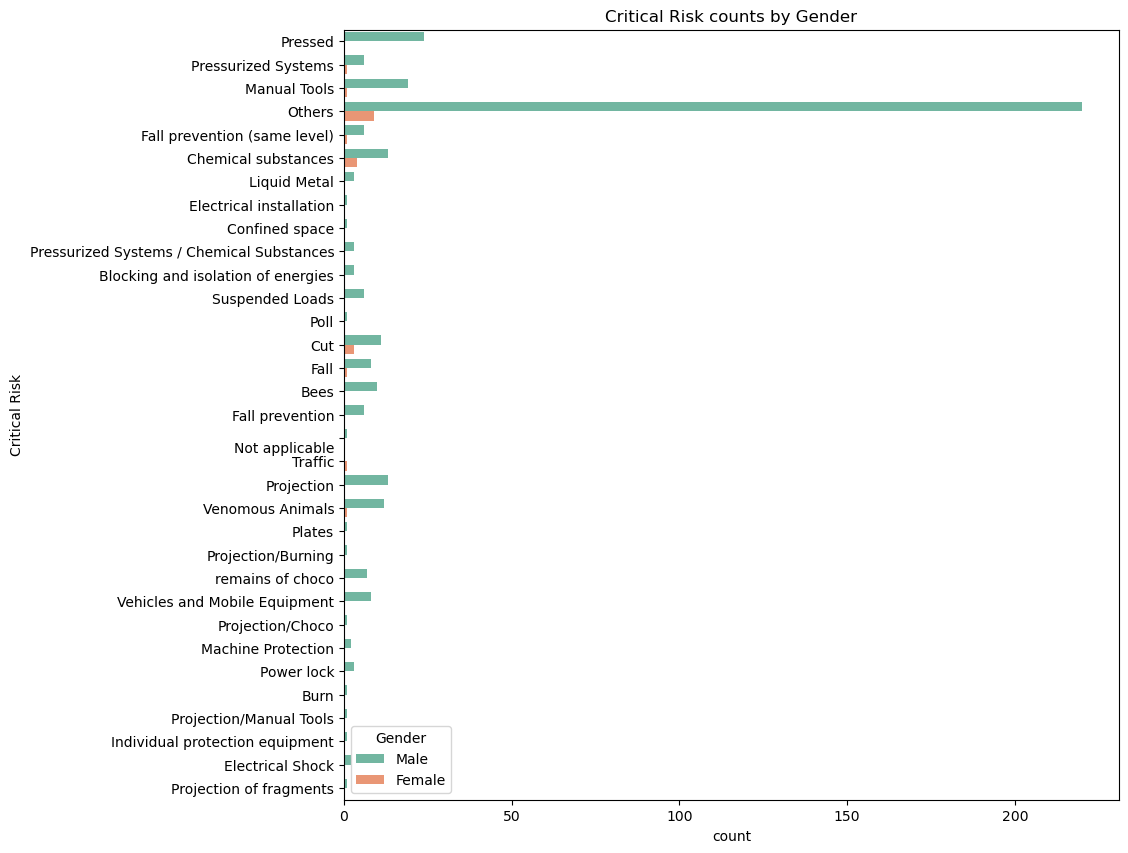

In [59]:
plt.figure(figsize=(10,10))
sns.countplot(y = industrial_safety_df['Critical Risk'], hue=industrial_safety_df['Gender'], palette='Set2')
plt.title('Critical Risk counts by Gender');

**Observations:**

* Most of the Critical Risks were for Men.
* Highest number of Critical Risks for Men were from Others type

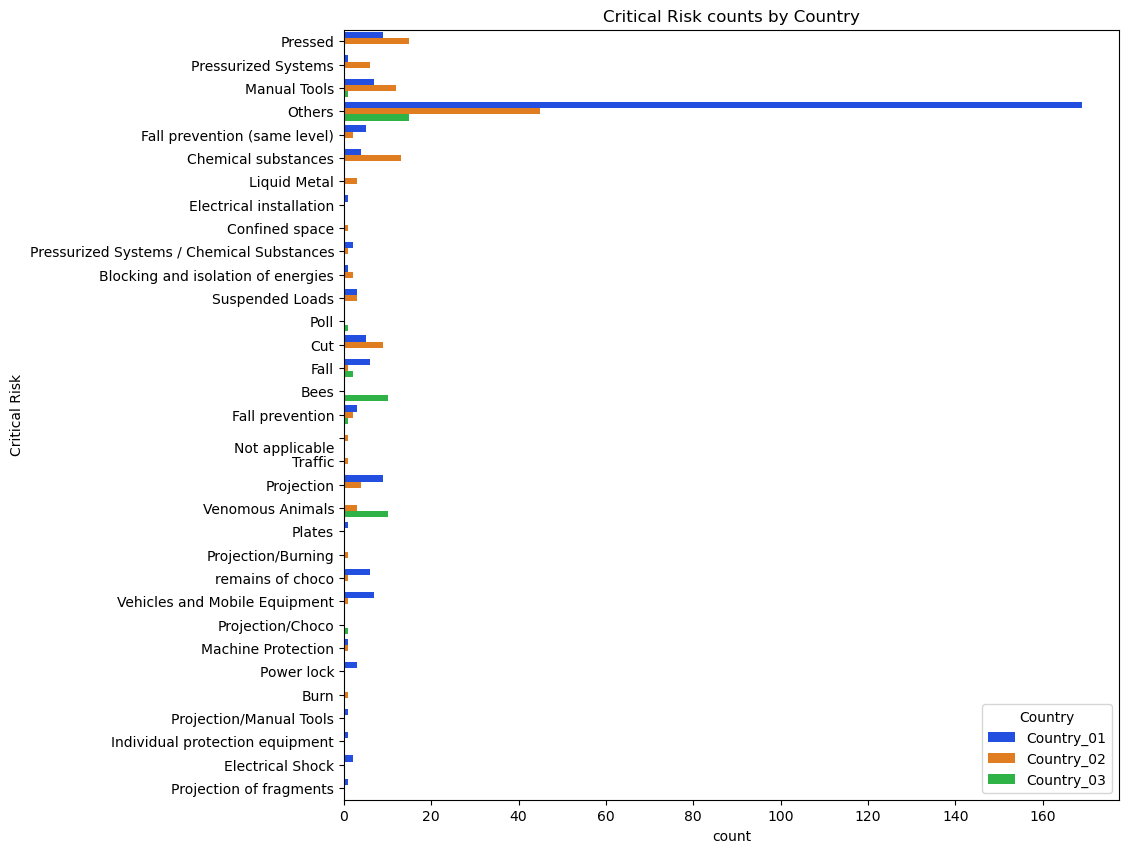

In [60]:
plt.figure(figsize=(10,10))
sns.countplot(y = industrial_safety_df['Critical Risk'], hue=industrial_safety_df['Country'], palette='bright')
plt.title('Critical Risk counts by Country');

**Observations:**

* Most of the Critical Risks were from Country_01 and they are of Others type.
* Country_03 has highest number of Critical Risks from Venomous Animals and Bees.

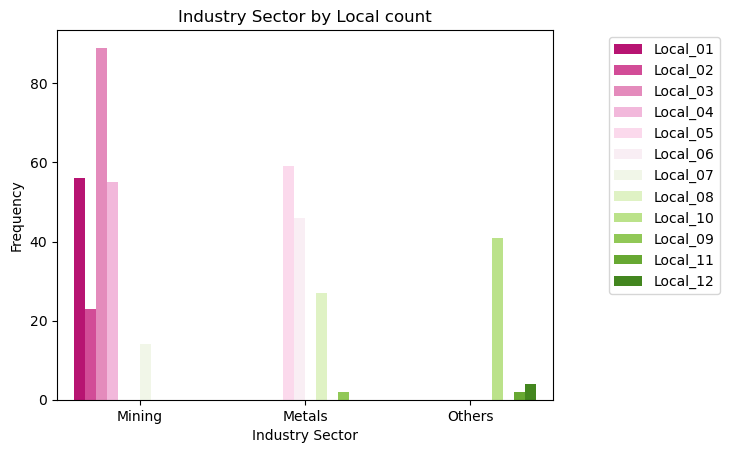

In [61]:
sns.countplot(industrial_safety_df,x='Industry Sector', hue=industrial_safety_df['Local'], saturation=1, palette='PiYG');
plt.title('Industry Sector by Local count');
plt.ylabel('Frequency')
plt.legend(loc='best', bbox_to_anchor=(1.35, 1))

**Observations:**

* Local 1,2,3,4 and 7 belong to Mining Sector
* Local Area 5,6,8 and 9 belong to Metal Sector.
* Other areas such as Local Area 10, 11 and 12 belong to Other Sectors.


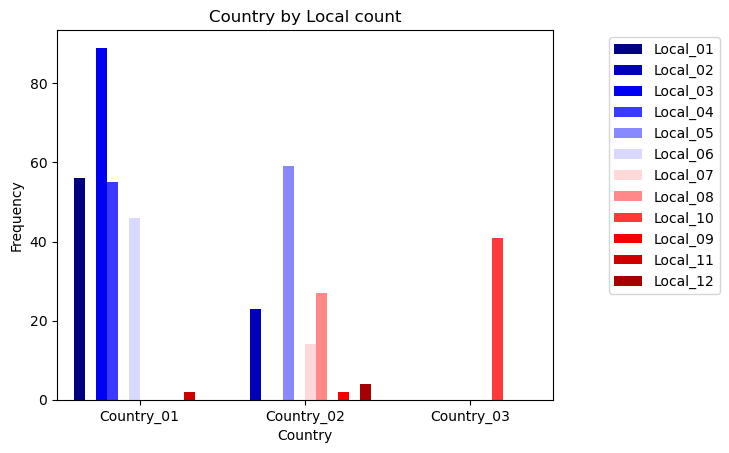

In [62]:
sns.countplot(industrial_safety_df,x='Country', hue=industrial_safety_df['Local'], saturation=1, palette='seismic');
plt.title('Country by Local count');
plt.ylabel('Frequency')
plt.legend(loc='best', bbox_to_anchor=(1.35, 1))

**Observations:**

* Local 1,3,4,6,11 belong to Country_01
* Local Area 2,5,7,8,9, 12 belong to Country_02.
* Local Area 10 belong to Country_03

#### EDA Summary

* Percentage(%) of accidents occurred in respective countries: 59% in Country_01, 31% in Country_02 and 10% in Country_03.
Industry Sector.
* Highest manufacturing plants are located in Local_03 city and lowest in Local_09 city.
* Highest number of manufacturing plants belongs to Mining sector, followed by Metals sector and then Others sector.
* Metals and Mining industry sector plants are not available in Country_03.
* Distribution of industry sector differ significantly in each country.
* The number of accidents decreases as the Accident Level increases and increases as the Potential Accident Level increases.
* There are more men working in this industry as compared to women.
* Males have a higher accident levels than females.
* There are many low risks at general accident level, but many high risks at potential accident level.
* Accidents are recorded from 1st Jan 2016 to 9th July 2017 in every month, there are high number of accidents in 2016 and less in 2017.
* Number of accidents are high in beginning of the year and it keeps decreasing later.
* Number of accidents are very high in particular days like 4, 8 and 16 in every month.
* Most of the critical risks are classified as Others.
* Because most part of the Critical Risks are classified as 'Others', there are too many risks to classify precisely


<font color=3d85c6>
    
####  Step 4: Data preparation - Cleansed data in .xlsx or .csv file [ 5 points ]
</font>

In Data Preparation we will use TF-IDF vectorizer and embedding models like Glove and word2vec to analyse further on which words or vector of words help in predicting the closest Accidental level.

**TfidfVectorizer (Term Frequency-Inverse Document Frequency):**

* Weighs the importance of each word in the document based on its frequency in the document and its frequency across all documents in the corpus.
* Assigns higher weights to words that are common in the document but rare in the corpus, and lower weights to words that are common across all documents.
* Represents text data using a sparse matrix similar to CountVectorizer, but the values are normalized using TF-IDF weights.
* Helps in addressing the issue of common words (e.g., "the", "is", "and") that may dominate the frequency counts but carry little semantic meaning.
* Generally performs better than CountVectorizer in tasks where both the presence and frequency of words are important, such as information retrieval, text classification, and topic modeling.

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_df = pd.DataFrame()

# Iterate over different n-gram ranges

for i in [1, 2, 3]:

    # Initialize TfidfVectorizer with specified parameters

    tfidf_vectorizer = TfidfVectorizer(max_features=10, norm='l2',  use_idf=True, ngram_range=(i, i))
    
    # Fit and transform the text column
    text_vectorized =  tfidf_vectorizer.fit_transform(industrial_safety_df['Cleaned_Description']).toarray()
    
    # Create a DataFrame from the TF-IDF vectors
    df_vectorized = pd.DataFrame(text_vectorized, columns=["TFIDF_" + n for n in tfidf_vectorizer.get_feature_names_out()])
    
    # Concatenate the TF-IDF DataFrame with the existing DataFrame
    tfidf_df = pd.concat([tfidf_df.reset_index(drop=True), df_vectorized.reset_index(drop=True)], axis=1)


In [64]:
# Display the size of tfidf_df

print('\nSize of tfidf_df is',tfidf_df.shape[0],'rows and',tfidf_df.shape[1],'columns.')
print(tfidf_df.shape)

# Display sample from df_vectorized

tfidf_df.sample(5)


Size of tfidf_df is 418 rows and 30 columns.
(418, 30)


,TFIDF_activ,TFIDF_caus,TFIDF_employe,TFIDF_hand,TFIDF_injuri,TFIDF_leav,TFIDF_oper,TFIDF_right,TFIDF_time,TFIDF_use,...,TFIDF_accid employe use,TFIDF_caus injuri describ,TFIDF_describ time accid,TFIDF_finger leav hand,TFIDF_finger right hand,TFIDF_generat describ injuri,TFIDF_hand caus injuri,TFIDF_injuri time accid,TFIDF_right hand caus,TFIDF_time accid employe
50,0.0,0.368462,0.0,0.0,0.000000,0.0,0.929643,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
230,0.0,0.625658,0.0,0.0,0.780098,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,0.0,0.334819,0.0,0.0,0.417467,0.0,0.844759,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# Replacing newline character with space and white space with _ for columns Employee type and Critical Risk

industrial_safety_df['Employee type'] = industrial_safety_df['Employee type'].str.replace(' ', '_')
industrial_safety_df['Critical Risk'] = industrial_safety_df['Critical Risk'].str.replace('\n', '').str.replace(' ', '_')


**Label encoding**

Label encoding is required to convert categorical data into numerical format that can be provided to machine learning algorithms,making it easier for algorithms to process the data. 

In [66]:
from sklearn.preprocessing import LabelEncoder

# Creating Label encoded DataFrame

label_df = pd.DataFrame()

# Label encoding

industrial_safety_df['Season'] = industrial_safety_df['Season'].replace('Summer', 'aSummer').replace('Fall', 'bFall').replace('Winter', 'cWinter').replace('Spring', 'dSpring')
label_df['Season'] = LabelEncoder().fit_transform(industrial_safety_df['Season']).astype(np.int8)

label_df['Accident Level'] = LabelEncoder().fit_transform(industrial_safety_df['Accident Level']).astype(np.int8)


**One-hot encoding**

It is typically used after label encoding when dealing with categorical variables, especially in scenarios where the categories do not have any ordinal relationship.


In [67]:
from tensorflow.keras.utils import to_categorical

# convert integers to  one hot encoded variables
y_dummies = to_categorical(label_df['Accident Level'])
y_dummies

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [68]:
# Dummy variables encoding for other features

Country_dummies = pd.get_dummies(industrial_safety_df['Country'], columns=["Country"], drop_first=True,dtype=int)
Local_dummies = pd.get_dummies(industrial_safety_df['Local'], columns=["Local"], drop_first=True,dtype=int)
Gender_dummies = pd.get_dummies(industrial_safety_df['Gender'], columns=["Gender"], drop_first=True,dtype=int)
Ind_dummies = pd.get_dummies(industrial_safety_df['Industry Sector'], columns=['Industry Sector'], prefix='Ind', drop_first=True,dtype=int)
EmpType_dummies = pd.get_dummies(industrial_safety_df['Employee type'], columns=['Employee type'], prefix='EmpType', drop_first=True,dtype=int)
CR_dummies = pd.get_dummies(industrial_safety_df['Critical Risk'], columns=['Critical Risk'], prefix='CR', drop_first=True,dtype=int)

In [69]:
# Merge the above dataframe with label encoding dataframe label_df
label_df = label_df.join(Country_dummies.reset_index(drop=True)).join(Local_dummies.reset_index(drop=True)).join(Gender_dummies.reset_index(drop=True)).join(Ind_dummies.reset_index(drop=True)).join(EmpType_dummies.reset_index(drop=True)).join(CR_dummies.reset_index(drop=True))

label_df = industrial_safety_df[['Year','Month','Day']].reset_index(drop=True).join(label_df.reset_index(drop=True))

In [70]:
label_df

,Year,Month,Day,Season,Accident Level,Country_02,Country_03,Local_02,Local_03,Local_04,...,CR_Projection,CR_Projection/Burning,CR_Projection/Choco,CR_Projection/Manual_Tools,CR_Projection_of_fragments,CR_Suspended_Loads,CR_Traffic,CR_Vehicles_and_Mobile_Equipment,CR_Venomous_Animals,CR_remains_of_choco
0,2016,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016,1,2,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,1,6,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2016,1,8,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2016,1,10,1,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2017,7,4,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
414,2017,7,4,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
415,2017,7,5,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
416,2017,7,6,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**GloVe(Global Vectors for Word Representation)** 

It is one of the most popular unsupervised learning algorithm for obtaining vector representations (embeddings) of words. It preserves the global contexts by creating a global co- occurrence matrix by estimating the probability a given word's co-occurence with other words.

In [71]:
from tqdm import tqdm

embeddings_index = {}
EMBEDDING_FILE = '/Users/sreekanthbl/Desktop/AIML/glove/glove.6B.200d.txt'
f = open(EMBEDDING_FILE)
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:07, 52481.06it/s]

Found 400000 word vectors.


In [72]:
# converting textual data from a sentence into numerical vector.

nltk.download('stopwords')

def sentence2vector(s):
    words = nltk.word_tokenize(str(s).lower())  # Tokenize the sentence directly
    words = [w for w in words if w.isalpha() and not w in stopwords.words('english')]   # Combine filter conditions

    # Use list comprehension with exception handling to create the embedding matrix
    M = [embeddings_index[w] for w in words if w in embeddings_index]

    # Aggregate word embeddings using numpy functions
    v = np.sum(M, axis=0)

    # Normalize the aggregated vector
    return v / np.sqrt((v ** 2).sum()) if isinstance(v, np.ndarray) else np.zeros(300)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sreekanthbl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
# create sentence GLOVE embeddings vectors using the above function for training and validation set

glove_df = [sentence2vector(x) for x in tqdm(industrial_safety_df['Cleaned_Description'])]

100%|████████████████████████████████████████| 418/418 [00:00<00:00, 441.33it/s]


In [74]:
# Considering only the top 30 GLOVE features and joining it with label encoding dataframe

feature_df = label_df.join(pd.DataFrame(glove_df).iloc[:,0:30].reset_index(drop=True))

In [75]:
# Displaying features of actual dataframe industrail_safety_df

industrial_safety_df.columns


Index(['Date', 'Country', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee type', 'Critical Risk',
       'Description', 'Day', 'Month', 'Year', 'Season', 'Cleaned_Description'],
      dtype='object')

In [76]:
# Displaying features of TfidfVectorizered dataset

tfidf_df.columns

Index(['TFIDF_activ', 'TFIDF_caus', 'TFIDF_employe', 'TFIDF_hand',
       'TFIDF_injuri', 'TFIDF_leav', 'TFIDF_oper', 'TFIDF_right', 'TFIDF_time',
       'TFIDF_use', 'TFIDF_caus injuri', 'TFIDF_describ injuri',
       'TFIDF_employe report', 'TFIDF_finger leav', 'TFIDF_hand caus',
       'TFIDF_injuri describ', 'TFIDF_leav hand', 'TFIDF_medic center',
       'TFIDF_right hand', 'TFIDF_time accid', 'TFIDF_accid employe use',
       'TFIDF_caus injuri describ', 'TFIDF_describ time accid',
       'TFIDF_finger leav hand', 'TFIDF_finger right hand',
       'TFIDF_generat describ injuri', 'TFIDF_hand caus injuri',
       'TFIDF_injuri time accid', 'TFIDF_right hand caus',
       'TFIDF_time accid employe'],
      dtype='object')

In [77]:
# Consider only top 30 GLOVE features and joining it with tfidf_df dataframe

feature_df = label_df.join(tfidf_df.reset_index(drop=True))

In [78]:
feature_df.sample(5)

,Year,Month,Day,Season,Accident Level,Country_02,Country_03,Local_02,Local_03,Local_04,...,TFIDF_accid employe use,TFIDF_caus injuri describ,TFIDF_describ time accid,TFIDF_finger leav hand,TFIDF_finger right hand,TFIDF_generat describ injuri,TFIDF_hand caus injuri,TFIDF_injuri time accid,TFIDF_right hand caus,TFIDF_time accid employe
75,2016,4,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,2016,2,24,1,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,2017,2,1,1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,2017,6,11,2,0,0,0,0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303,2017,1,24,1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
feature_df.shape

(418, 85)

In [80]:
# Saving cleaned data as .csv file

feature_df.to_csv("cleaned_features.csv") 

<font color=3d85c6>
    
#### Step 5: Design train and test basic machine learning classifiers [ 10 Points]

</font>

In [81]:
X = feature_df.drop(['Accident Level'], axis = 1)
y = feature_df['Accident Level']

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)
X_train, X_test, y_train_dummy, y_test_dummy = train_test_split(X, y_dummies, test_size = 0.20, random_state = 1, stratify = y)

In [83]:
print('X_train shape is ',X_train.shape)
print('X_test shape is ',X_test.shape)
print('y_train shape is ',y_train.shape)
print('y_test shape is ',y_test.shape)

X_train shape is  (334, 84)
X_test shape is  (84, 84)
y_train shape is  (334,)
y_test shape is  (84,)


In [84]:
feature_df['Accident Level'].value_counts()

Accident Level
0    309
1     40
2     31
3     30
4      8
Name: count, dtype: int64

In [85]:
# Concatenating training data together

X_up = pd.concat([X_train, y_train], axis=1)

class_counts = X_up['Accident Level'].value_counts()
majority_class_label = class_counts.idxmax()
minority_class_labels = class_counts.drop(index=majority_class_label).index

upsampled_minority = {}

# Upsample each minority class to match the majority class
for level in minority_class_labels:
    minority_class = X_up[X_up['Accident Level'] == level]
    upsampled_minority[level] = resample(minority_class,
                                         replace=True,
                                         n_samples=class_counts[majority_class_label],
                                         random_state=1)

# Combine majority class with upsampled minority classes

df_upsampled = pd.concat([X_up[X_up['Accident Level'] == majority_class_label]] + list(upsampled_minority.values()))

In [86]:
df_upsampled

,Year,Month,Day,Season,Country_02,Country_03,Local_02,Local_03,Local_04,Local_05,...,TFIDF_caus injuri describ,TFIDF_describ time accid,TFIDF_finger leav hand,TFIDF_finger right hand,TFIDF_generat describ injuri,TFIDF_hand caus injuri,TFIDF_injuri time accid,TFIDF_right hand caus,TFIDF_time accid employe,Accident Level
6,2016,1,16,1,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0
84,2016,4,7,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0
284,2017,1,5,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0
66,2016,3,22,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0
164,2016,7,8,2,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,2017,5,10,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,4
351,2017,3,18,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,4
161,2016,7,2,2,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.534613,0.0,0.575506,4
161,2016,7,2,2,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.534613,0.0,0.575506,4


In [87]:
# Accident level counts after upsampling

df_upsampled['Accident Level'].value_counts()

Accident Level
0    247
1    247
2    247
3    247
4    247
Name: count, dtype: int64

Now all the Accident levels have same count

In [88]:
# Separating independent variables and target variables

X_train_up = df_upsampled.drop(['Accident Level'], axis = 1) # Considering all Predictors
y_train_up = df_upsampled['Accident Level']

**Using SMOTE to upsample the unbalanced dataset**

In [89]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
sm = SMOTE(random_state=1)

# Perform SMOTE on the training data
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Create a DataFrame from the resampled data
df_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)
df_smote['Accident Level'] = y_train_smote

In [90]:
df_smote

,Year,Month,Day,Season,Country_02,Country_03,Local_02,Local_03,Local_04,Local_05,...,TFIDF_caus injuri describ,TFIDF_describ time accid,TFIDF_finger leav hand,TFIDF_finger right hand,TFIDF_generat describ injuri,TFIDF_hand caus injuri,TFIDF_injuri time accid,TFIDF_right hand caus,TFIDF_time accid employe,Accident Level
0,2016,9,1,3,1,0,0,0,0,1,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,1
1,2016,11,29,3,1,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,1
2,2016,1,16,1,1,0,0,0,0,1,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0
3,2016,4,7,0,0,0,0,1,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0
4,2017,2,27,1,0,0,0,1,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2016,1,21,1,0,0,0,0,0,0,...,0.0,0.0,0.143006,0.0,0.0,0.0,0.000000,0.0,0.000000,4
1231,2016,5,5,1,0,0,0,0,0,0,...,0.0,0.0,0.901308,0.0,0.0,0.0,0.000000,0.0,0.000000,4
1232,2016,4,11,0,0,0,0,0,0,0,...,0.0,0.0,0.458441,0.0,0.0,0.0,0.000000,0.0,0.000000,4
1233,2016,6,2,1,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.521109,0.0,0.560969,4


In [91]:
# Separating independent variables and target variables

X_train_smote = df_smote.iloc[:,:-1] # Considering all Predictors
y_train_smote = df_smote.iloc[:,-1:]

In [92]:
# Accident level counts after smote

df_smote['Accident Level'].value_counts()

Accident Level
1    247
0    247
3    247
2    247
4    247
Name: count, dtype: int64

In [93]:
# converting  integers to dummy variables (i.e. one hot encoded)

y_train_smote_dummy = to_categorical(y_train_smote['Accident Level'])
y_train_smote_dummy

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

**Using standard scaler to standardize the data**

In [94]:
# Using standard scaler to standardize the data

scaler_X = StandardScaler()
pipeline = Pipeline(steps=[('s', scaler_X)])

X_train.iloc[:,:6] = pipeline.fit_transform(X_train.iloc[:,:6]) # Scaling only first 6 feautres
X_test.iloc[:,:6] = pipeline.fit_transform(X_test.iloc[:,:6]) # Scaling only first 6 feautres

**Using PCA to find out Principal Components that capture about 95% of the variance in the data**

In [95]:
# generating the covariance matrix and the eigen values for the PCA analysis

cov_matrix = np.cov(X_train.T) # the relevanat covariance matrix
#print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)

In [96]:
# Cumulative variance explained analysis 

tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)


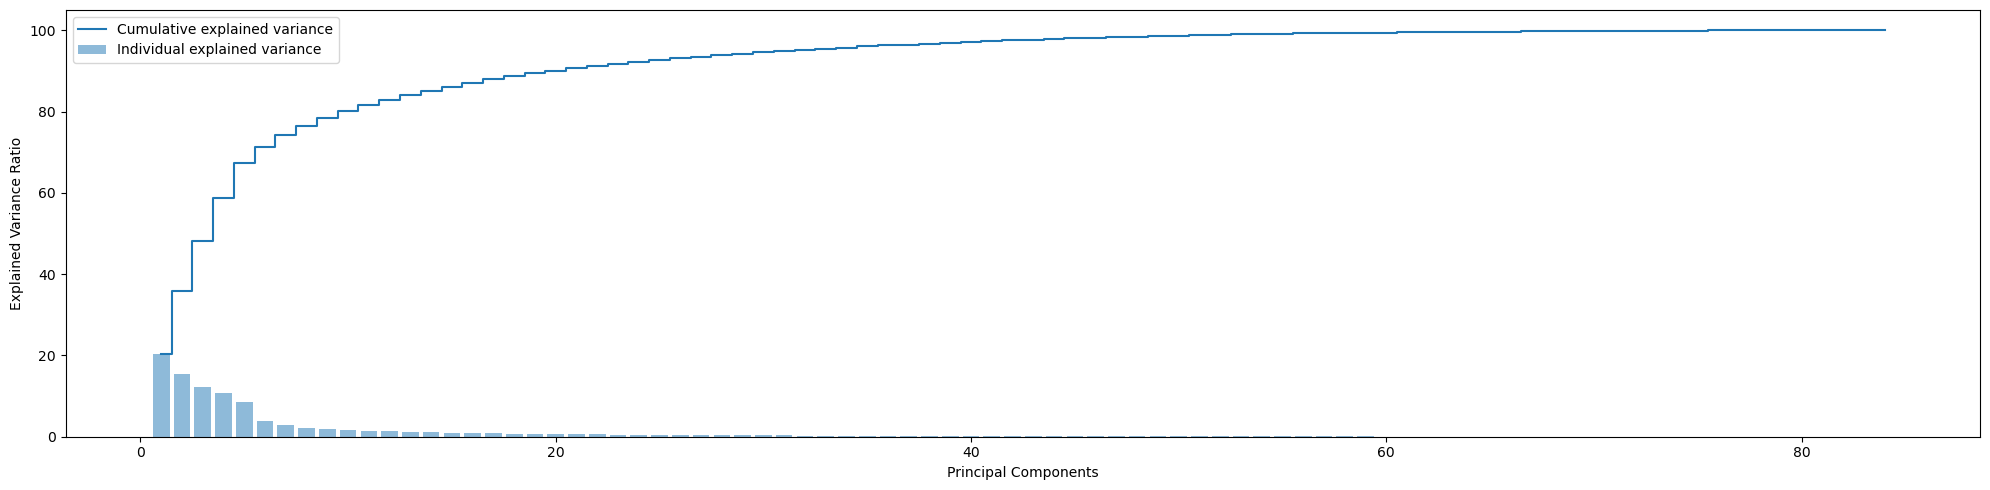

In [97]:
# Plotting the variance expalained by the principal components and the 'cumulative variance explained'

plt.figure(figsize=(20 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [98]:
# Capturing 90% variance of the data

pca = PCA(n_components = 0.90)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [99]:
# Reduced shape of X_train and X_test

print(X_train_reduced.shape)
print(X_test_reduced.shape)

(334, 20)
(84, 20)


The number of features is reduced to 20

In [100]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, log_loss, classification_report

def train_test_model(model, method, X_train, X_test, y_train, y_test, of_type, index, scale, report, save_model):
    
    if report == "yes":
        print(model)
        print("***************************************************************************")

    model.fit(X_train, y_train)  # Fit the model on Training set

    if of_type == "coef":
        # Intercept and Coefficients
        print("The intercept for our model is", model.intercept_, "\n")
        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))

    y_pred = model.predict(X_test)  # Predict on Test set

    # Initialise mc_logloss
    mc_logloss = 1.00
    if method not in ['LogisticRegression', 'SVC'] and hasattr(model, 'predict_proba'):
        y_predictions = model.predict_proba(X_test)
    else:
         y_predictions = model.predict(X_test)
    
    train_accuracy_score = model.score(X_train, y_train)
    test_accuracy_score = model.score(X_test, y_test)

    precision_score_val = precision_score(y_test, y_pred, average='weighted')
    recall_score_val = recall_score(y_test, y_pred, average='weighted')
    f1_score_val = f1_score(y_test, y_pred, average='weighted')

    if method not in ['LogisticRegression', 'SVC']:
        mc_logloss = log_loss(y_test, y_predictions)

    if report == "yes":
        # Model - Confusion matrix
        model_cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(model_cm, annot=True,  fmt='.2f', xticklabels=["I", "II", "III", "IV", "V"], yticklabels=["I", "II", "III", "IV", "V"])
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

        # Model - Classification report
        model_cr = classification_report(y_test, y_pred)
        print(model_cr)

    # Store the accuracy results for each model in a dataframe for final comparison
    results_df = pd.DataFrame({'Method': method, 'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score,
                               'Precision': precision_score_val, 'Recall': recall_score_val, 'F1-Score': f1_score_val,
                               'Multi-Class Logloss': mc_logloss}, index=[index])

    # Save the model
    if save_model == "yes":
        filename = 'finalised_model.sav'
        pickle.dump(model, open(filename, 'wb'))

    return results_df  # return all the metrics along with predictions

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


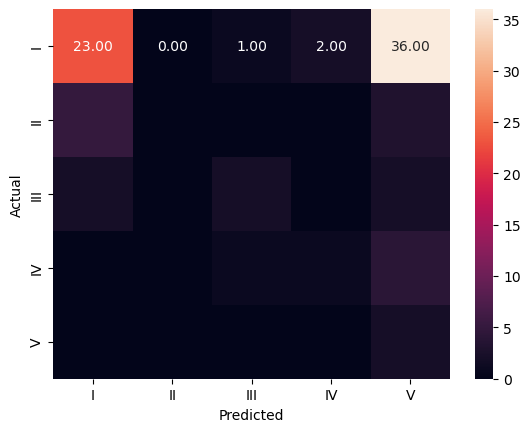

              precision    recall  f1-score   support

           0       0.77      0.37      0.50        62
           1       0.00      0.00      0.00         8
           2       0.50      0.33      0.40         6
           3       0.33      0.17      0.22         6
           4       0.04      1.00      0.08         2

    accuracy                           0.33        84
   macro avg       0.33      0.37      0.24        84
weighted avg       0.63      0.33      0.42        84



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression with SMOTE,0.490688,0.333333,0.62641,0.333333,0.415436,1.830877


In [101]:
# Building a Linear Regression model

resultsDf = pd.DataFrame()

lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
lr_smote_df = train_test_model(lr, 'Logistic Regression with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 1, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,lr_smote_df])
resultsDf

DecisionTreeClassifier(random_state=1)
***************************************************************************


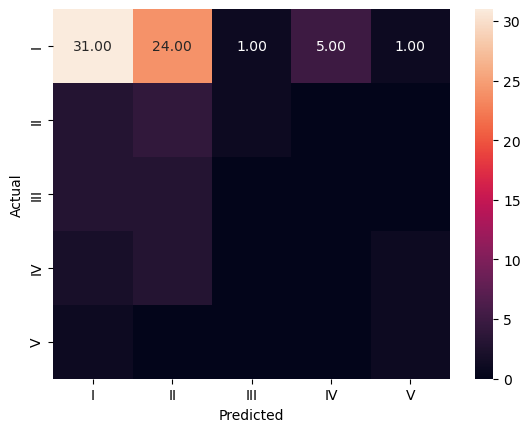

              precision    recall  f1-score   support

           0       0.78      0.50      0.61        62
           1       0.12      0.50      0.19         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.33      0.50      0.40         2

    accuracy                           0.43        84
   macro avg       0.25      0.30      0.24        84
weighted avg       0.59      0.43      0.48        84



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression with SMOTE,0.490688,0.333333,0.626410,0.333333,0.415436,1.830877
2,Decision Tree with SMOTE,0.998381,0.428571,0.591165,0.428571,0.476311,20.596373


In [102]:
# Building a DecisionTree model

dt = DecisionTreeClassifier(criterion = "gini", random_state = 1)
                                                     
# Train and Test the model
dt_smote_df = train_test_model(dt, 'Decision Tree with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 2, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,dt_smote_df])
resultsDf

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1, verbose=2)
***************************************************************************
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 co

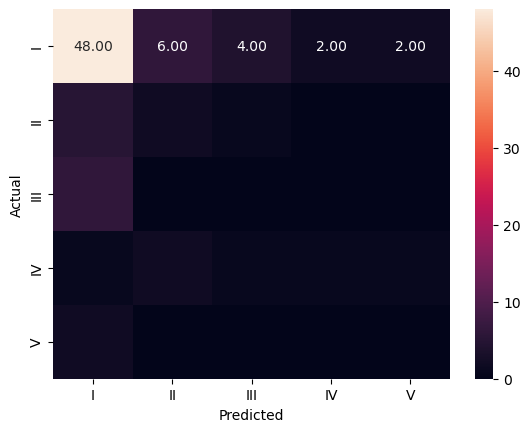

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        62
           1       0.20      0.25      0.22         8
           2       0.00      0.00      0.00         6
           3       0.33      0.17      0.22         6
           4       0.00      0.00      0.00         2

    accuracy                           0.61        84
   macro avg       0.26      0.24      0.24        84
weighted avg       0.61      0.61      0.61        84



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression with SMOTE,0.490688,0.333333,0.626410,0.333333,0.415436,1.830877
2,Decision Tree with SMOTE,0.998381,0.428571,0.591165,0.428571,0.476311,20.596373
3,Random Forest with SMOTE,0.995142,0.607143,0.614286,0.607143,0.608466,3.431066


In [103]:
# Building a RandomForest model

rf = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1, verbose=2)
                                                     
# Train and Test the model
rf_smote_df = train_test_model(rf, 'Random Forest with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 3, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,rf_smote_df])
resultsDf

SVC(probability=True)
***************************************************************************


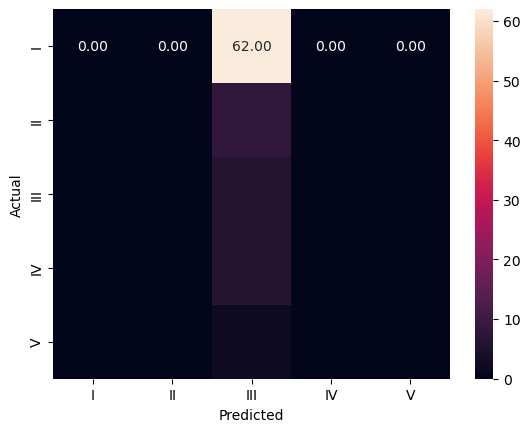

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.00      0.00      0.00         8
           2       0.07      1.00      0.13         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.07        84
   macro avg       0.01      0.20      0.03        84
weighted avg       0.01      0.07      0.01        84



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression with SMOTE,0.490688,0.333333,0.626410,0.333333,0.415436,1.830877
2,Decision Tree with SMOTE,0.998381,0.428571,0.591165,0.428571,0.476311,20.596373
3,Random Forest with SMOTE,0.995142,0.607143,0.614286,0.607143,0.608466,3.431066
4,SVM with SMOTE,0.283401,0.071429,0.005102,0.071429,0.009524,1.600904


In [104]:
# Building a SVM Model

svm = SVC(kernel = 'rbf', probability=True)
                                                     
# Train and Test the model
svm_smote_df = train_test_model(svm, 'SVM with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 4, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,svm_smote_df])
resultsDf

GaussianNB()
***************************************************************************


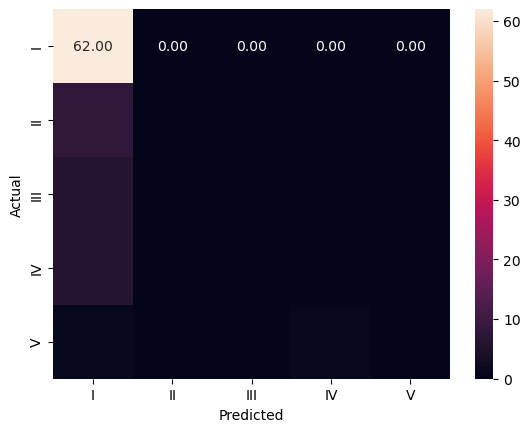

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.55      0.74      0.63        84



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression with SMOTE,0.490688,0.333333,0.626410,0.333333,0.415436,1.830877
2,Decision Tree with SMOTE,0.998381,0.428571,0.591165,0.428571,0.476311,20.596373
3,Random Forest with SMOTE,0.995142,0.607143,0.614286,0.607143,0.608466,3.431066
4,SVM with SMOTE,0.283401,0.071429,0.005102,0.071429,0.009524,1.600904
5,GaussianNB with SMOTE,0.625911,0.738095,0.551348,0.738095,0.631199,9.440004


In [105]:
# Building a GaussianNB Model

gnb = GaussianNB()
                                                     
# Train and Test the model
gnb_smote_df = train_test_model(gnb, 'GaussianNB with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 5, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,gnb_smote_df])
resultsDf

KNeighborsClassifier()
***************************************************************************


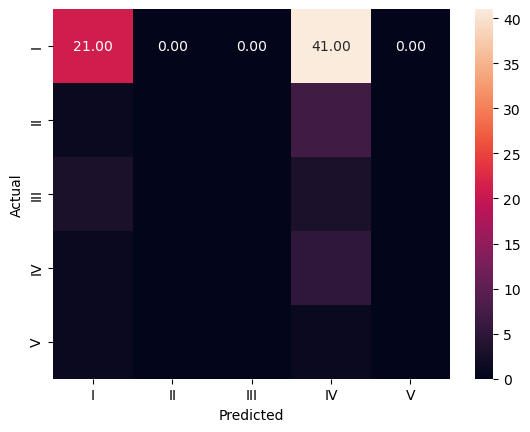

              precision    recall  f1-score   support

           0       0.78      0.34      0.47        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.09      0.83      0.16         6
           4       0.00      0.00      0.00         2

    accuracy                           0.31        84
   macro avg       0.17      0.23      0.13        84
weighted avg       0.58      0.31      0.36        84



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression with SMOTE,0.490688,0.333333,0.626410,0.333333,0.415436,1.830877
2,Decision Tree with SMOTE,0.998381,0.428571,0.591165,0.428571,0.476311,20.596373
3,Random Forest with SMOTE,0.995142,0.607143,0.614286,0.607143,0.608466,3.431066
4,SVM with SMOTE,0.283401,0.071429,0.005102,0.071429,0.009524,1.600904
5,GaussianNB with SMOTE,0.625911,0.738095,0.551348,0.738095,0.631199,9.440004
6,KNN with SMOTE,0.865587,0.309524,0.580340,0.309524,0.359652,7.487607


In [106]:
# Building a KNN Model

knn=KNeighborsClassifier(n_neighbors= 5)
                                                     
# Train and Test the model
knn_smote_df = train_test_model(knn, 'KNN with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 6, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,knn_smote_df])
resultsDf

AdaBoostClassifier()
***************************************************************************


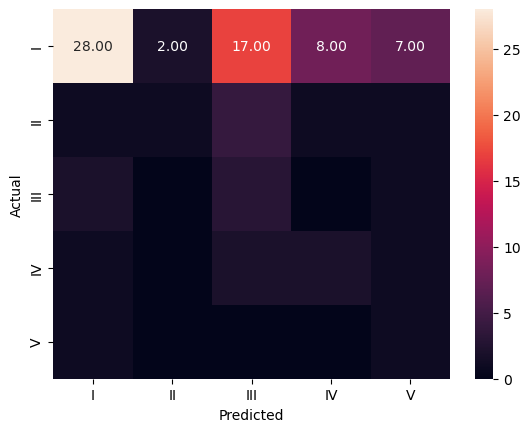

              precision    recall  f1-score   support

           0       0.85      0.45      0.59        62
           1       0.33      0.12      0.18         8
           2       0.12      0.50      0.19         6
           3       0.18      0.33      0.24         6
           4       0.09      0.50      0.15         2

    accuracy                           0.42        84
   macro avg       0.31      0.38      0.27        84
weighted avg       0.68      0.42      0.49        84



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression with SMOTE,0.490688,0.333333,0.626410,0.333333,0.415436,1.830877
2,Decision Tree with SMOTE,0.998381,0.428571,0.591165,0.428571,0.476311,20.596373
3,Random Forest with SMOTE,0.995142,0.607143,0.614286,0.607143,0.608466,3.431066
4,SVM with SMOTE,0.283401,0.071429,0.005102,0.071429,0.009524,1.600904
5,GaussianNB with SMOTE,0.625911,0.738095,0.551348,0.738095,0.631199,9.440004
6,KNN with SMOTE,0.865587,0.309524,0.580340,0.309524,0.359652,7.487607
7,AdaBoost Classifier with SMOTE,0.555466,0.416667,0.681402,0.416667,0.486266,1.344312


In [107]:
# Building AdaBoost Model

abcl = AdaBoostClassifier(learning_rate=1.0)
                                                     
# Train and Test the model
abcl_smote_df = train_test_model(abcl, 'AdaBoost Classifier with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 7, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,abcl_smote_df])
resultsDf

GradientBoostingClassifier(max_depth=5, n_estimators=10)
***************************************************************************


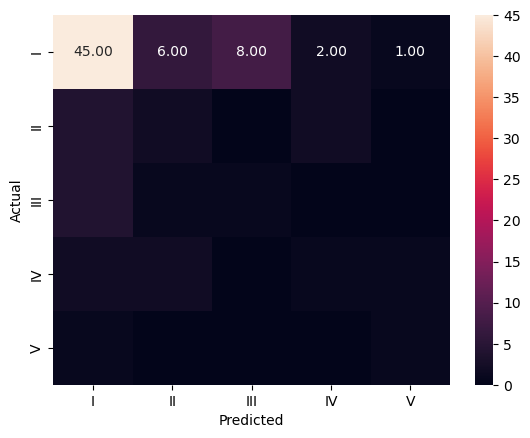

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        62
           1       0.18      0.25      0.21         8
           2       0.11      0.17      0.13         6
           3       0.20      0.17      0.18         6
           4       0.33      0.50      0.40         2

    accuracy                           0.60        84
   macro avg       0.33      0.36      0.34        84
weighted avg       0.64      0.60      0.62        84



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression with SMOTE,0.490688,0.333333,0.626410,0.333333,0.415436,1.830877
2,Decision Tree with SMOTE,0.998381,0.428571,0.591165,0.428571,0.476311,20.596373
3,Random Forest with SMOTE,0.995142,0.607143,0.614286,0.607143,0.608466,3.431066
4,SVM with SMOTE,0.283401,0.071429,0.005102,0.071429,0.009524,1.600904
5,GaussianNB with SMOTE,0.625911,0.738095,0.551348,0.738095,0.631199,9.440004
6,KNN with SMOTE,0.865587,0.309524,0.580340,0.309524,0.359652,7.487607
7,AdaBoost Classifier with SMOTE,0.555466,0.416667,0.681402,0.416667,0.486266,1.344312
8,GradientBoost Classifier with SMOTE,0.952227,0.595238,0.640587,0.595238,0.615039,1.097940


In [108]:
# Building AdaBoost Model

gbcl  = GradientBoostingClassifier(n_estimators=10, max_depth=5)
                                                     
# Train and Test the model
gbcl_smote_df = train_test_model(gbcl, 'GradientBoost Classifier with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 8, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,gbcl_smote_df])
resultsDf

**Observations**
* There is lot of difference observed between Train Accuracy and Test Accuracy in all the models due to overfitting.
* GaussianNB with SMOTE has highest Recall value.
* SVM with SMOTE is giving lowest Train Accuracy and Test Accuracy	

In [109]:
def train_test_allmodels(X_train_common, X_test_common, y_train, y_test, scale):

    # define classification models
    models=[['LogisticRegression',LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)],
        ['DecisionTreeClassifier',DecisionTreeClassifier(criterion = 'gini', random_state=1)],
        ['RandomForestClassifier',RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1, verbose=2)],    
        ['SVC',SVC(kernel = 'rbf', probability=True)],
        ['GaussianNB',GaussianNB()],    
        ['KNeighborsClassifier',KNeighborsClassifier(n_neighbors = 5)],
        ['AdaBoostClassifier',AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)],
        ['GradientBoostingClassifier',GradientBoostingClassifier(loss='deviance', n_estimators=50, learning_rate=0.1, validation_fraction=0.2, 
                                       random_state=1)]
    ]

    all_resultsDf = pd.DataFrame()
    i = 1
    for name, classifier in models:
        # Train and Test the model
        reg_resultsDf = train_test_model(classifier, name, X_train_common, X_test_common, y_train, y_test, 'none', i, scale, 'no', 'no')

        # Store the accuracy results for each model in a dataframe for final comparison
        all_resultsDf = pd.concat([all_resultsDf, reg_resultsDf])
        i = i+1

    return all_resultsDf

In [110]:
# Train and test all models with original cleaned data

train_test_allmodels(X_train, X_test, y_train, y_test, 'no')

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 co

,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,LogisticRegression,0.760479,0.726190,0.549071,0.726190,0.625331,1.000000
2,DecisionTreeClassifier,0.994012,0.595238,0.619836,0.595238,0.606936,14.589098
3,RandomForestClassifier,0.970060,0.738095,0.603469,0.738095,0.648751,3.948873
4,SVC,0.739521,0.738095,0.544785,0.738095,0.626875,1.000000
5,GaussianNB,0.278443,0.238095,0.707560,0.238095,0.297050,26.769286
6,KNeighborsClassifier,0.742515,0.738095,0.558072,0.738095,0.635582,4.328033
7,AdaBoostClassifier,0.742515,0.738095,0.610417,0.738095,0.653186,1.357234
8,GradientBoostingClassifier,0.937126,0.726190,0.644037,0.726190,0.673595,0.915428


**Observations**

* With original cleaned data, difference between Train Accuracy and Test Accuracy is reduced. Huge difference is only observed in Decision Trees,RandomForest and GradientBoosting classifiers. 
* SVC has AdaBoost Classifier have closest Train and Test Accuracy with 73% Recall value but their Multi-Class Logloss value is greater than 1.
* GradientBoostingClassifier has lowest Multi-Class Logloss and good Recall and precision values but the difference between Train and Test Accuracies are high.

In [111]:
# Doing Hyper performance tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV

def gridsearch_allmodels(X_train_common, X_test_common, y_train, y_test, scale):
    
    # Define classification models with their respective parameter grids
    models = [
        ['LogisticRegression', LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1), 
         {'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
        ['DecisionTreeClassifier', DecisionTreeClassifier(criterion='gini', random_state=1), 
         {'max_depth': [3, 5, 10]}],
        ['RandomForestClassifier', RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1, verbose=2), 
         {'n_estimators': [10, 15, 20]}],
        ['SVC', SVC(kernel='rbf', probability=True), 
         {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}],
        ['GaussianNB', GaussianNB(), {}],  # No hyperparameters to tune for GaussianNB
        ['KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5), 
         {'n_neighbors': [3, 5, 7]}],
        ['AdaBoostClassifier', AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1), 
         {'n_estimators': [10, 15, 20], 'learning_rate': [0.01, 0.1, 0.5]}],
        ['GradientBoostingClassifier', GradientBoostingClassifier(loss='deviance', n_estimators=50, learning_rate=0.1, validation_fraction=0.2, random_state=1), 
         {'n_estimators': [10, 15, 20], 'learning_rate': [0.01, 0.1, 0.5]}]
    ]
    
    all_gridResultsDf = pd.DataFrame()
    
    for name, classifier, param_grid in models:
        # Initialize GridSearchCV
        grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy', cv=5)
        
        # Train the model with hyperparameter tuning
        grid_search.fit(X_train_common, y_train)
        
        # Print the best parameters found by GridSearchCV
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        
        # Train and test the model with the best parameters
        grid_results = train_test_model(grid_search.best_estimator_, name, X_train_common, X_test_common, y_train, y_test, 'none', 1, scale, 'no', 'no')
        
        # Store the accuracy results for each model in a dataframe for final comparison
        all_gridResultsDf = pd.concat([all_gridResultsDf, grid_results])
    
    return all_gridResultsDf

In [112]:
# Train and test all models using gridsearch with SMOTE data

all_gridResultsDf = pd.DataFrame()
gridsearch_allmodels(X_train_smote, X_test, y_train_smote, y_test, 'no')

Best parameters for LogisticRegression: {'C': 0.1}
Best parameters for DecisionTreeClassifier: {'max_depth': 10}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    1.3s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent worker

building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
Best parameters for RandomForestClassifier: {'n_estimators': 20}
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
Best parameters for SVC: {'C': 10

,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,LogisticRegression,0.472874,0.333333,0.632362,0.333333,0.417023,1.000000
1,DecisionTreeClassifier,0.952227,0.404762,0.535577,0.404762,0.452784,19.437635
1,RandomForestClassifier,0.998381,0.547619,0.547619,0.547619,0.547619,1.873023
1,SVC,0.998381,0.738095,0.544785,0.738095,0.626875,1.000000
1,GaussianNB,0.625911,0.738095,0.551348,0.738095,0.631199,9.440004
1,KNeighborsClassifier,0.909312,0.535714,0.571026,0.535714,0.542159,7.311077
1,AdaBoostClassifier,0.551417,0.726190,0.626349,0.726190,0.666226,1.325819
1,GradientBoostingClassifier,0.991903,0.654762,0.577891,0.654762,0.613546,1.275039


**Observations**

* Not much of change is observed even with hyper parameter tuning and Gridsearch
* Overfitting needs to be removed.